# Online Shopper Intention Dataset

### CRIPS - DM Methodology
 1. Bussiness Understanding.
 2. Data Understanding. 
 3. Data Preparation.
 4. Modelling. 
 5. Evaluation. 
 6. Deplotment.

#### 1.Bussiness Understanding


- The Data set hold user session data from an e-commerce website collected over a period of one year.
- The Session represent a unique user. 
- The goal is to 

### 2.Data Understanding.

#### 2.1 Dependecies

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from scipy.stats import chi2_contingency
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, roc_curve
from sklearn.metrics import silhouette_score

from sklearn.cluster import KMeans

#### 2.1 Load the dataset

In [4]:
#arbitrary seed for reproducibility
np.random.seed(96)

In [5]:
#load data in to a pandas dataframe
df = pd.read_csv('../data/raw/online_shoppers_intention.csv')

##### 2.2 Display the basic information

In [8]:
df.head(15)

Administrative  Administrative_Duration  Informational  \
0                0                      0.0              0   
1                0                      0.0              0   
2                0                      0.0              0   
3                0                      0.0              0   
4                0                      0.0              0   
5                0                      0.0              0   
6                0                      0.0              0   
7                1                      0.0              0   
8                0                      0.0              0   
9                0                      0.0              0   
10               0                      0.0              0   
11               0                      0.0              0   
12               0                      0.0              0   
13               0                      0.0              0   
14               0                      0.0              0   

    Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                      0.0               1                 0.000000   
1                      0.0               2                64.000000   
2                      0.0               1                 0.000000   
3                      0.0               2                 2.666667   
4                      0.0              10               627.500000   
5                      0.0              19               154.216667   
6                      0.0               1                 0.000000   
7                      0.0               0                 0.000000   
8                      0.0               2                37.000000   
9                      0.0               3               738.000000   
10                     0.0               3               395.000000   
11                     0.0              16               407.750000   
12                     0.0               7               280.500000   
13                     0.0               6                98.000000   
14                     0.0               2                68.000000   

    BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0      0.200000   0.200000         0.0         0.0   Feb                 1   
1      0.000000   0.100000         0.0         0.0   Feb                 2   
2      0.200000   0.200000         0.0         0.0   Feb                 4   
3      0.050000   0.140000         0.0         0.0   Feb                 3   
4      0.020000   0.050000         0.0         0.0   Feb                 3   
5      0.015789   0.024561         0.0         0.0   Feb                 2   
6      0.200000   0.200000         0.0         0.4   Feb                 2   
7      0.200000   0.200000         0.0         0.0   Feb                 1   
8      0.000000   0.100000         0.0         0.8   Feb                 2   
9      0.000000   0.022222         0.0         0.4   Feb                 2   
10     0.000000   0.066667         0.0         0.0   Feb                 1   
11     0.018750   0.025833         0.0         0.4   Feb                 1   
12     0.000000   0.028571         0.0         0.0   Feb                 1   
13     0.000000   0.066667         0.0         0.0   Feb                 2   
14     0.000000   0.100000         0.0         0.0   Feb                 3   

    Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0         1       1            1  Returning_Visitor    False    False  
1         2       1            2  Returning_Visitor    False    False  
2         1       9            3  Returning_Visitor    False    False  
3         2       2            4  Returning_Visitor    False    False  
4         3       1            4  Returning_Visitor     True    False  
5         2       1            3  Returning_Visitor    False    False  
6         4       3            3  Returning_Visitor    False    False  
7         2       1            5  Returning_Visit

In [9]:
df.tail(15)

Administrative  Administrative_Duration  Informational  \
12315               0                     0.00              0   
12316               0                     0.00              0   
12317               3                   100.50              0   
12318               0                     0.00              0   
12319               0                     0.00              0   
12320               0                     0.00              0   
12321               0                     0.00              0   
12322               6                    76.25              0   
12323               2                    64.75              0   
12324               0                     0.00              1   
12325               3                   145.00              0   
12326               0                     0.00              0   
12327               0                     0.00              0   
12328               4                    75.00              0   
12329               0                     0.00              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
12315                     0.0               7               212.500000   
12316                     0.0              44               615.000000   
12317                     0.0              95              1453.640882   
12318                     0.0               6               279.000000   
12319                     0.0              21              1128.583333   
12320                     0.0               8               143.583333   
12321                     0.0               6                 0.000000   
12322                     0.0              22              1075.250000   
12323                     0.0              44              1157.976190   
12324                     0.0              16               503.000000   
12325                     0.0              53              1783.791667   
12326                     0.0               5               465.750000   
12327                     0.0               6               184.250000   
12328                     0.0              15               346.000000   
12329                     0.0               3                21.250000   

       BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
12315     0.000000   0.033333    0.000000         0.0   Nov                 3   
12316     0.013636   0.036364    0.000000         0.0   Dec                 4   
12317     0.002105   0.012761    0.000000         0.0   Dec                 2   
12318     0.000000   0.033333    0.000000         0.0   Dec                 1   
12319     0.000000   0.013043    3.685401         0.0   Dec                 2   
12320     0.014286   0.050000    0.000000         0.0   Nov                 2   
12321     0.200000   0.200000    0.000000         0.0   Nov                 1   
12322     0.000000   0.004167    0.000000         0.0   Dec                 2   
12323     0.000000   0.013953    0.000000         0.0   Nov                 2   
12324     0.000000   0.037647    0.000000         0.0   Nov                 2   
12325     0.007143   0.029031   12.241717         0.0   Dec                 4   
12326     0.000000   0.021333    0.000000         0.0   Nov                 3   
12327     0.083333   0.086667    0.000000         0.0   Nov                 3   
12328     0.000000   0.021053    0.000000         0.0   Nov                 2   
12329     0.000000   0.066667    0.000000         0.0   Nov                 3   

       Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
12315        2       1           11  Returning_Visitor     True    False  
12316        1       3            1  Returning_Visitor    False    False  
12317        2       3            2        New_Visitor    False    False  
12318        2       3           10  Returning_Visitor     True    False  
12319        2       1            2  Returning_Visitor    False    False  
12320        2       3            

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [8]:
df.describe(include='all').T

count unique                top   freq        mean  \
Administrative           12330.0    NaN                NaN    NaN    2.315166   
Administrative_Duration  12330.0    NaN                NaN    NaN   80.818611   
Informational            12330.0    NaN                NaN    NaN    0.503569   
Informational_Duration   12330.0    NaN                NaN    NaN   34.472398   
ProductRelated           12330.0    NaN                NaN    NaN   31.731468   
ProductRelated_Duration  12330.0    NaN                NaN    NaN  1194.74622   
BounceRates              12330.0    NaN                NaN    NaN    0.022191   
ExitRates                12330.0    NaN                NaN    NaN    0.043073   
PageValues               12330.0    NaN                NaN    NaN    5.889258   
SpecialDay               12330.0    NaN                NaN    NaN    0.061427   
Month                      12330     10                May   3364         NaN   
OperatingSystems         12330.0    NaN                NaN    NaN    2.124006   
Browser                  12330.0    NaN                NaN    NaN    2.357097   
Region                   12330.0    NaN                NaN    NaN    3.147364   
TrafficType              12330.0    NaN                NaN    NaN    4.069586   
VisitorType                12330      3  Returning_Visitor  10551         NaN   
Weekend                    12330      2              False   9462         NaN   
Revenue                    12330      2              False  10422         NaN   

                                 std  min       25%         50%          75%  \
Administrative              3.321784  0.0       0.0         1.0          4.0   
Administrative_Duration   176.779107  0.0       0.0         7.5     93.25625   
Informational               1.270156  0.0       0.0         0.0          0.0   
Informational_Duration    140.749294  0.0       0.0         0.0          0.0   
ProductRelated             44.475503  0.0       7.0        18.0         38.0   
ProductRelated_Duration  1913.669288  0.0  184.1375  598.936905  1464.157214   
BounceRates                 0.048488  0.0       0.0    0.003112     0.016813   
ExitRates                   0.048597  0.0  0.014286    0.025156         0.05   
PageValues                 18.568437  0.0       0.0         0.0          0.0   
SpecialDay                  0.198917  0.0       0.0         0.0          0.0   
Month                            NaN  NaN       NaN         NaN          NaN   
OperatingSystems            0.911325  1.0       2.0         2.0          3.0   
Browser                     1.717277  1.0       2.0         2.0          2.0   
Region                      2.401591  1.0       1.0         3.0          4.0   
TrafficType                 4.025169  1.0       2.0         2.0          4.0   
VisitorType                      NaN  NaN       NaN         NaN          NaN   
Weekend                          NaN  NaN       NaN         NaN          NaN   
Revenue                          NaN  NaN       NaN         NaN          NaN   

                                 max  
Administrative                  27.0  
Administrative_Duration      3398.75  
Informational                   24.0  
Informational_Duration      2549.375  
ProductRelated                 705.0  
ProductRelated_Duration  63973.52223  
BounceRates                      0.2  
ExitRates                        0.2  
PageValues                361.763742  
SpecialDay                       1.0  
Month                            NaN  
OperatingSystems                 8.0  
Browser                         13.0  
Region                           9.0  
TrafficType                     20.0  
VisitorType                      NaN  
Weekend                          NaN  
Revenue                          NaN

In [10]:
#Double check for missing values
print("Missing values")
print(df.isnull().sum())

Missing values
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [11]:
print("\nDuplicate values in rows:", df.duplicated().sum())

# Display the duplicate rows
df[df.duplicated(keep=False)]



Duplicate values in rows: 125


Administrative  Administrative_Duration  Informational  \
85                  0                      0.0              0   
132                 0                      0.0              0   
158                 0                      0.0              0   
159                 0                      0.0              0   
178                 0                      0.0              0   
...               ...                      ...            ...   
11934               0                      0.0              0   
11938               0                      0.0              0   
12159               0                      0.0              0   
12180               0                      0.0              0   
12185               0                      0.0              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
85                        0.0               1                      0.0   
132                       0.0               1                      0.0   
158                       0.0               1                      0.0   
159                       0.0               1                      0.0   
178                       0.0               1                      0.0   
...                       ...             ...                      ...   
11934                     0.0               1                      0.0   
11938                     0.0               1                      0.0   
12159                     0.0               1                      0.0   
12180                     0.0               1                      0.0   
12185                     0.0               1                      0.0   

       BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
85             0.2        0.2         0.0         0.0   Feb                 1   
132            0.2        0.2         0.0         0.0   Feb                 3   
158            0.2        0.2         0.0         0.0   Feb                 1   
159            0.2        0.2         0.0         0.0   Feb                 3   
178            0.2        0.2         0.0         0.0   Feb                 3   
...            ...        ...         ...         ...   ...               ...   
11934          0.2        0.2         0.0         0.0   Dec                 1   
11938          0.2        0.2         0.0         0.0   Dec                 1   
12159          0.2        0.2         0.0         0.0   Dec                 1   
12180          0.2        0.2         0.0         0.0   Dec                 1   
12185          0.2        0.2         0.0         0.0   Dec                 8   

       Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
85           1       1            3  Returning_Visitor    False    False  
132          2       3            3  Returning_Visitor    False    False  
158          1       1            3  Returning_Visitor    False    False  
159          2       3            3  Returning_Visitor    False    False  
178          2       3            3  Returning_Visitor    False    False  
...        ...     ...          ...                ...      ...      ...  
11934        1       1            2        New_Visitor    False    False  
11938        1       4            1  Returning_Visitor     True    False  
12159        1       1            3  Returning_Visitor    False    False  
12180       13       9           20  Returning_Visitor    False    False  
12185       13       9           20              Other    False    False  

[201 rows x 18 columns]

In [12]:
print("\nUnique values in each column:")
print(df.nunique())


Unique values in each column:
Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64


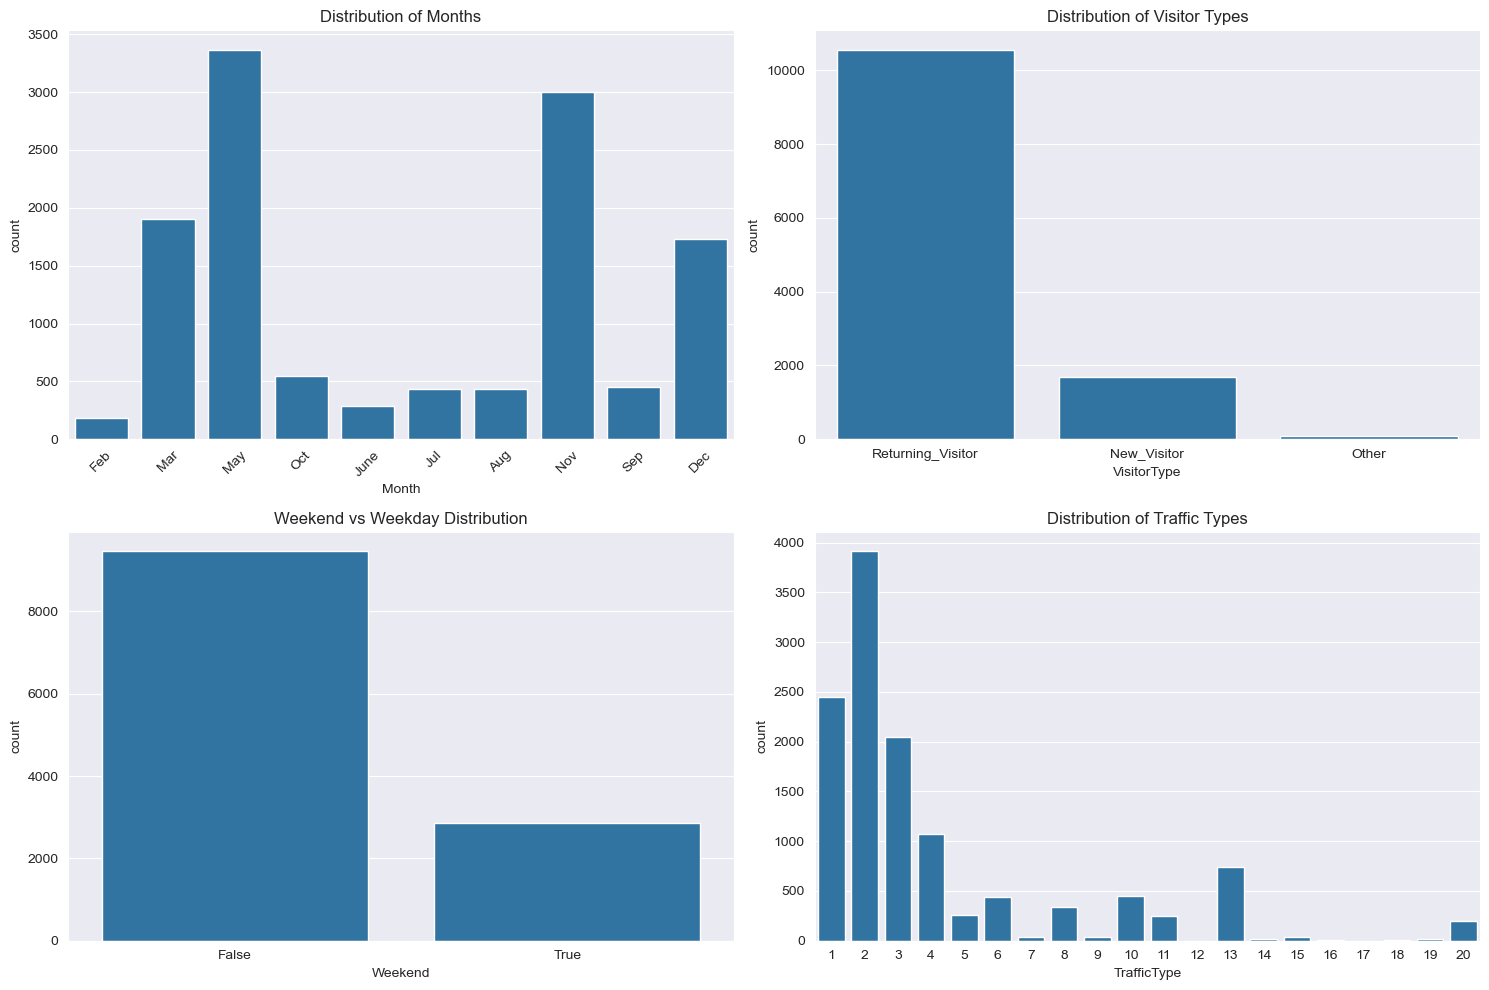

In [16]:
# Set style for better visualizations
sns.set_style('darkgrid')

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Month distribution
sns.countplot(data=df, x='Month', ax=axes[0,0])
axes[0,0].set_title('Distribution of Months')
axes[0,0].tick_params(axis='x', rotation=45)

# Visitor Type distribution
sns.countplot(data=df, x='VisitorType', ax=axes[0,1])
axes[0,1].set_title('Distribution of Visitor Types')

# Weekend distribution
sns.countplot(data=df, x='Weekend', ax=axes[1,0])
axes[1,0].set_title('Weekend vs Weekday Distribution')

# Traffic Type distribution
sns.countplot(data=df, x='TrafficType', ax=axes[1,1])
axes[1,1].set_title('Distribution of Traffic Types')

plt.tight_layout()
plt.show()

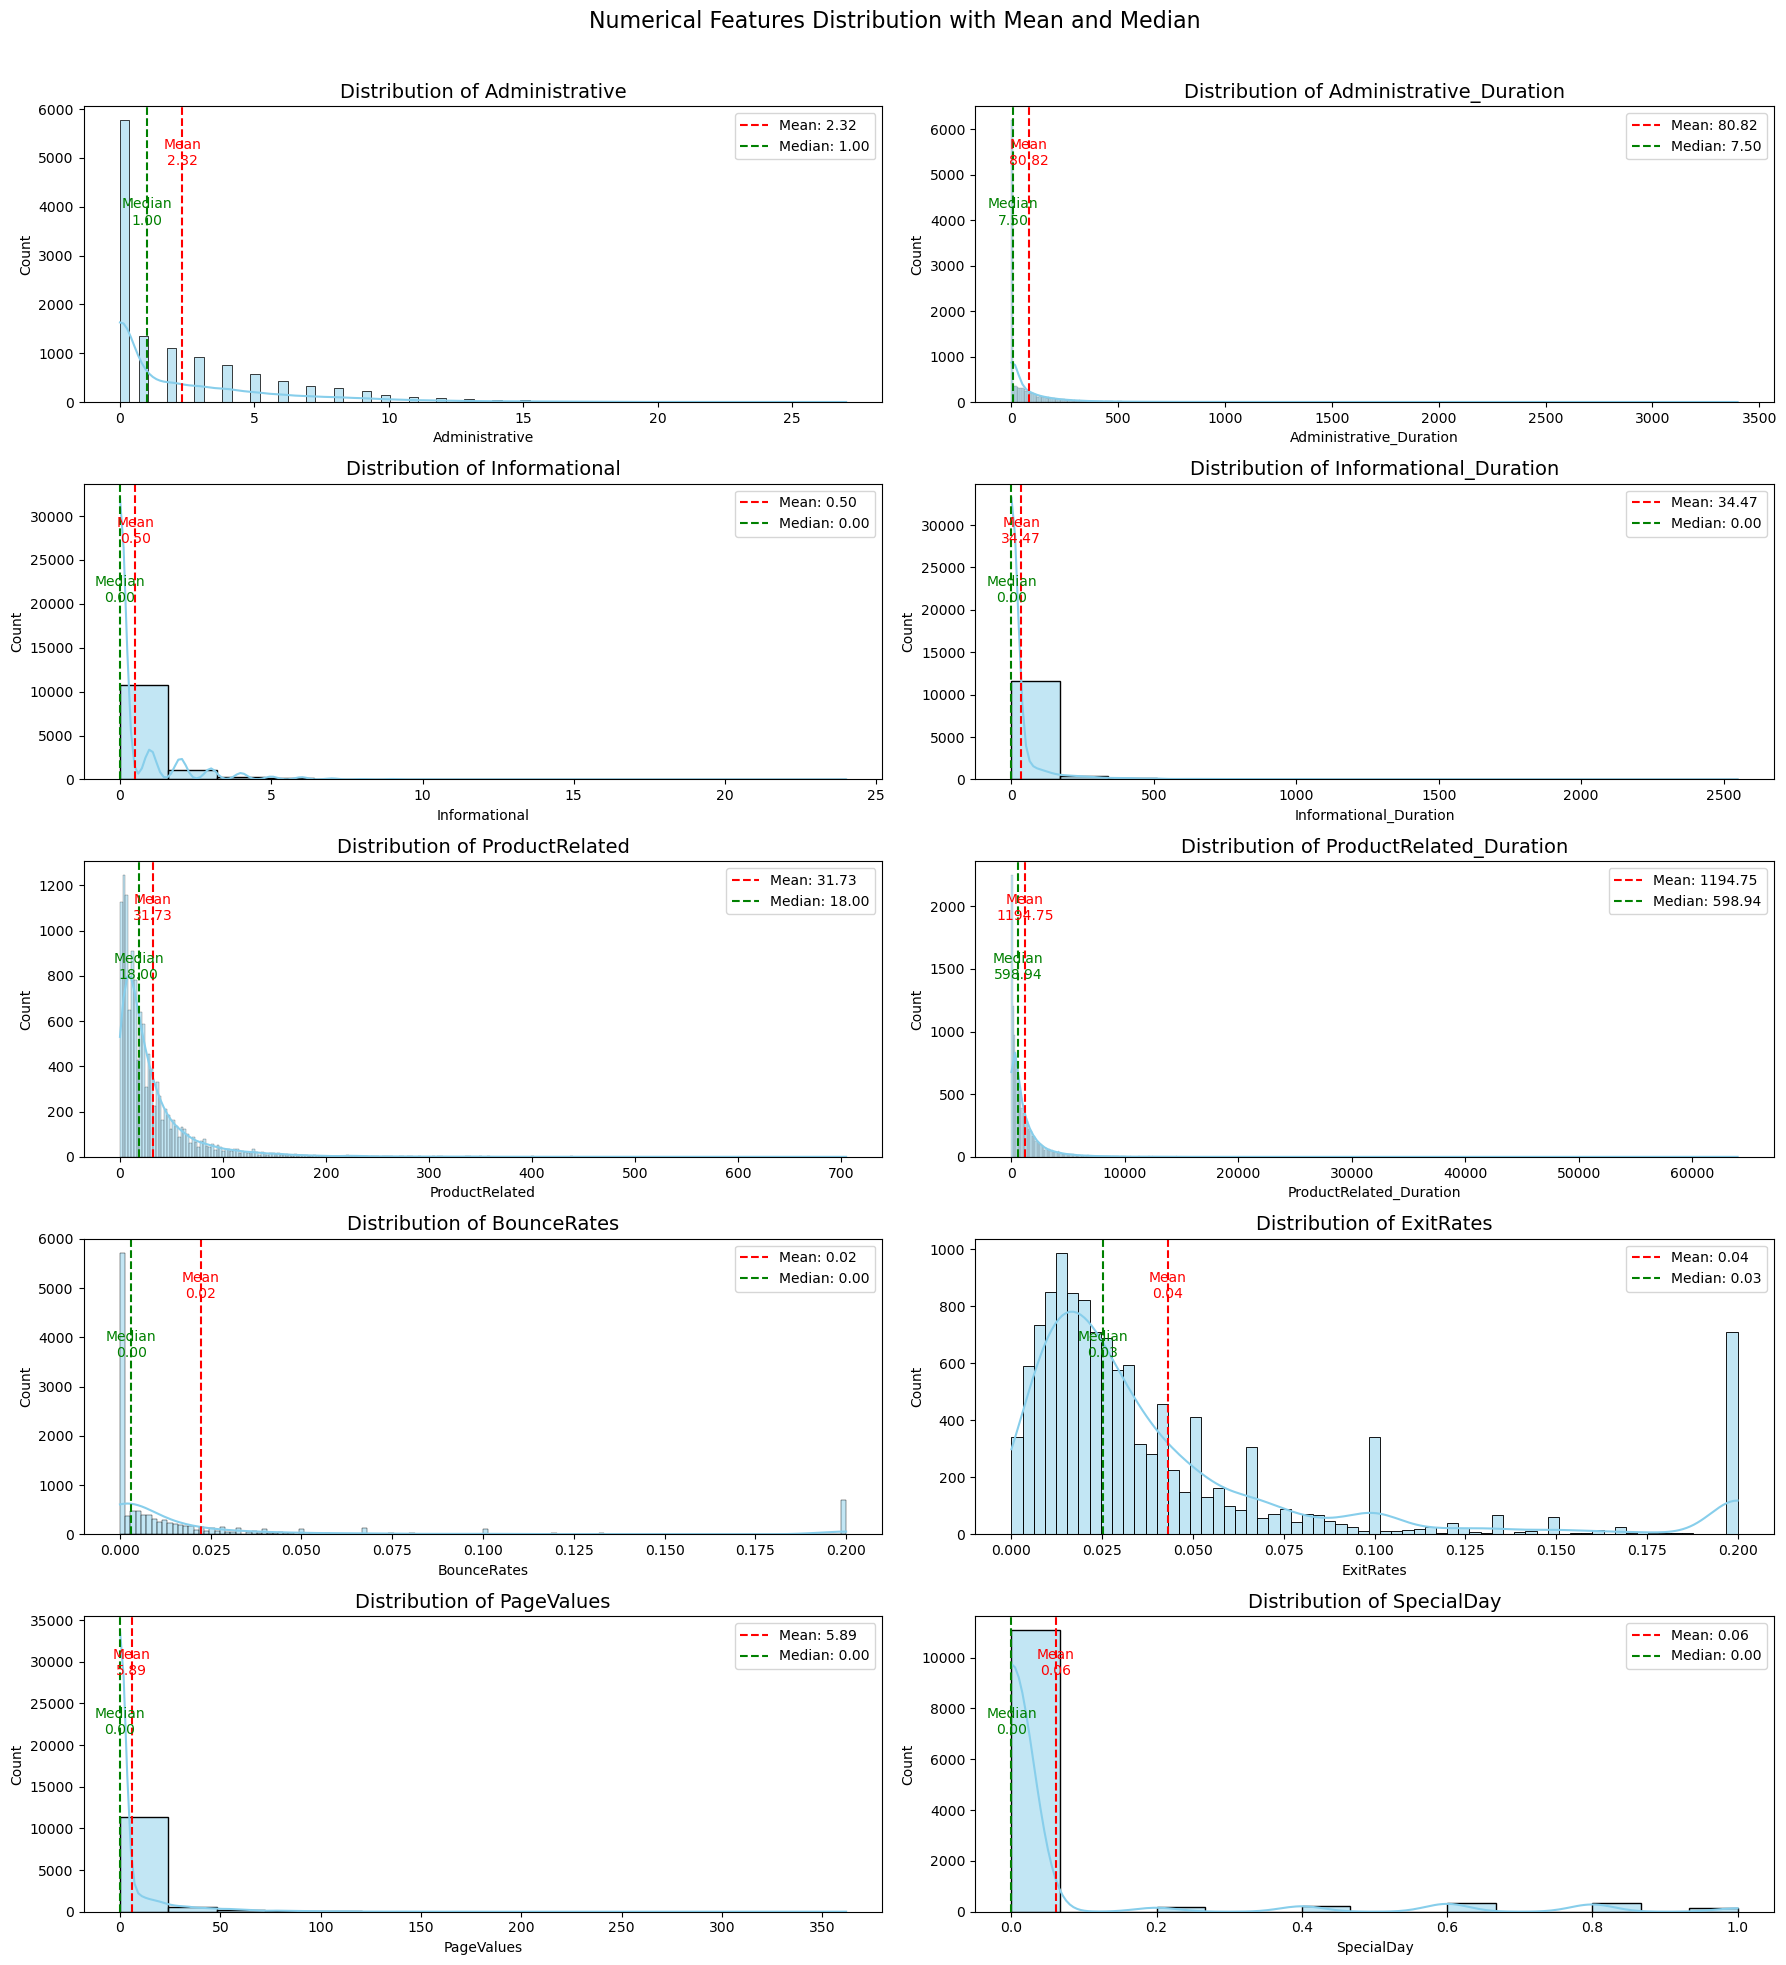

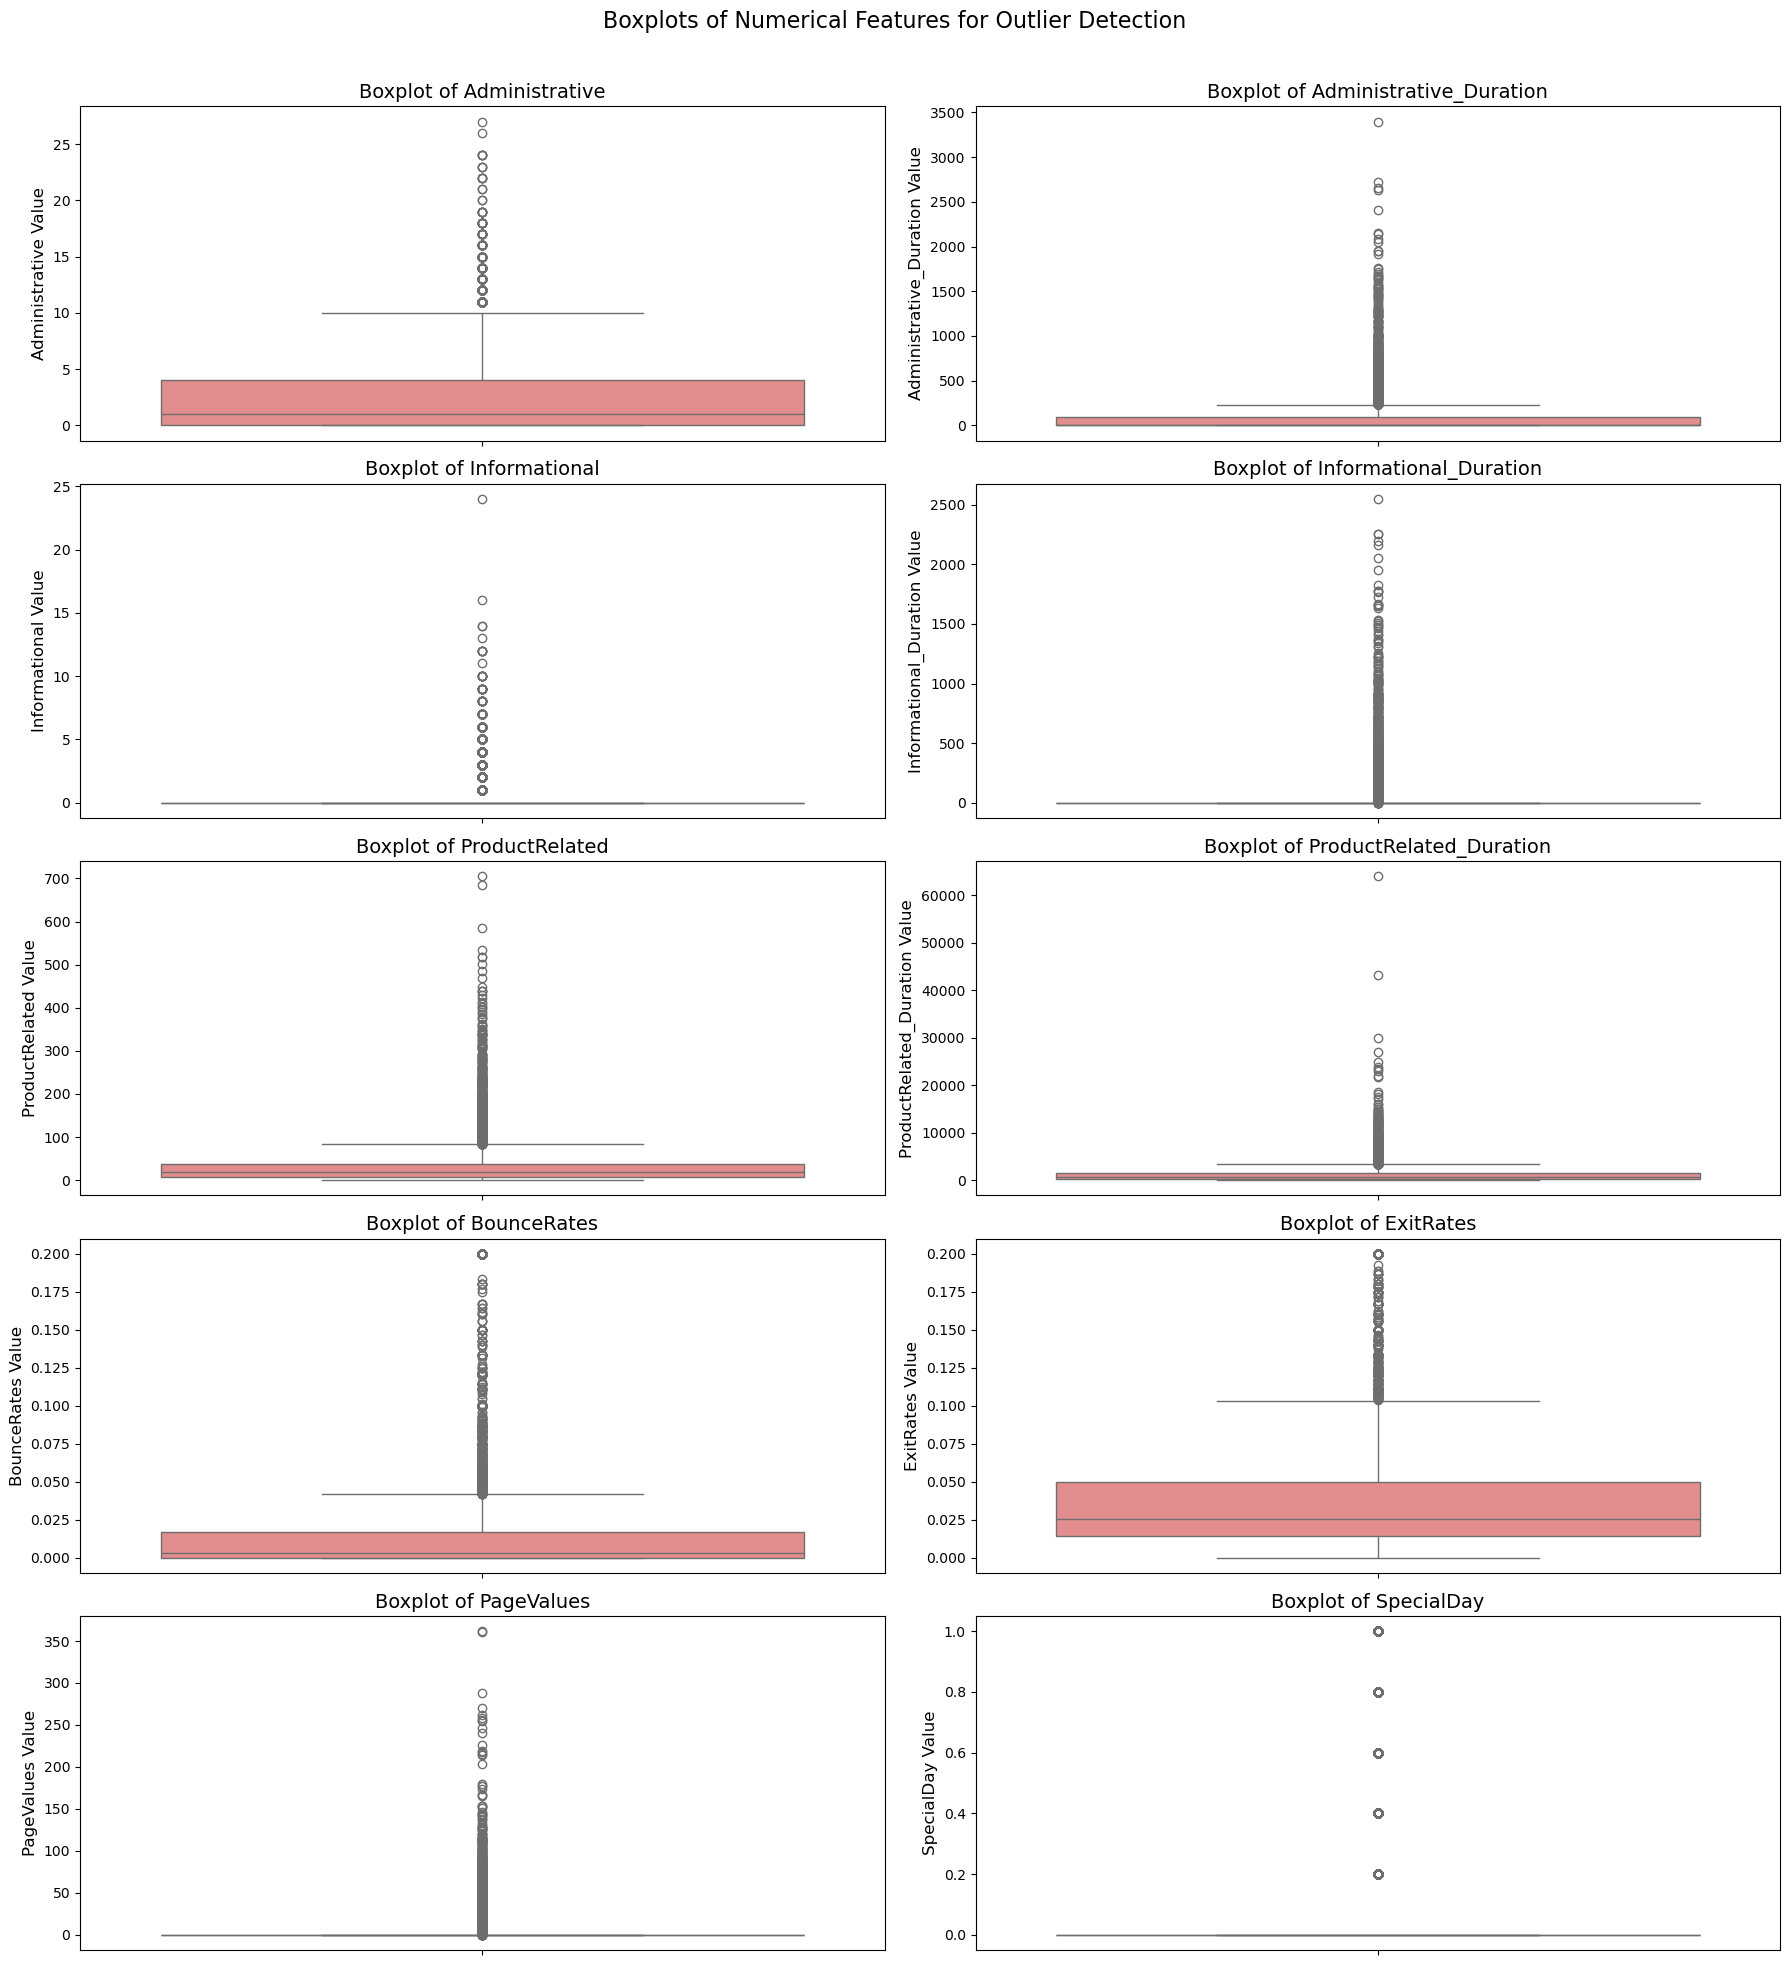

In [15]:
def analyse_numerical_feature_(df):
    # Define numerical columns
    numerical_cols = ['Administrative', 'Administrative_Duration', 'Informational', 
                      'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
                      'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']
    
    # Plot distribution with KDE and statistical lines
    num_features = len(numerical_cols)
    num_rows = (num_features + 1) // 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(18, num_rows * 4))
    axes = axes.flatten()
    
    for i, col in enumerate(numerical_cols):
        mean_val = df[col].mean()
        median_val = df[col].median()
        
        sns.histplot(df[col], kde=True, ax=axes[i], color='skyblue')
        axes[i].set_title(f'Distribution of {col}', fontsize=14)
        axes[i].axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
        axes[i].axvline(median_val, color='green', linestyle='--', label=f'Median: {median_val:.2f}')
        axes[i].legend()
        
        # Annotate mean and median
        axes[i].text(mean_val, axes[i].get_ylim()[1] * 0.8, f'Mean\n{mean_val:.2f}', 
                     color='red', ha='center')
        axes[i].text(median_val, axes[i].get_ylim()[1] * 0.6, f'Median\n{median_val:.2f}', 
                     color='green', ha='center')

    # Remove empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.suptitle("Numerical Features Distribution with Mean and Median", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.97])  # Adjust layout to fit title
    plt.show()

    # Plot boxplots to check for outliers
    fig, axes = plt.subplots(num_rows, 2, figsize=(18, num_rows * 4))
    axes = axes.flatten()
    
    for i, col in enumerate(numerical_cols):
        sns.boxplot(data=df, y=col, ax=axes[i], color='lightcoral')
        axes[i].set_title(f'Boxplot of {col}', fontsize=14)
        axes[i].set_ylabel(f'{col} Value', fontsize=12)
        
    # Remove empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.suptitle("Boxplots of Numerical Features for Outlier Detection", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.97])  # Adjust layout to fit title
    plt.savefig("../reports/figures/Task_2/numerical_features_boxplots_and_distribution.png")
    plt.show()

# Call the function with your dataset
analyse_numerical_feature_(df)


##### The data shows a gaussian distribution therefore, in later steps the use of z-scores will be used to standarize the data distribution.
https://developers.google.com/machine-learning/clustering/prepare-data

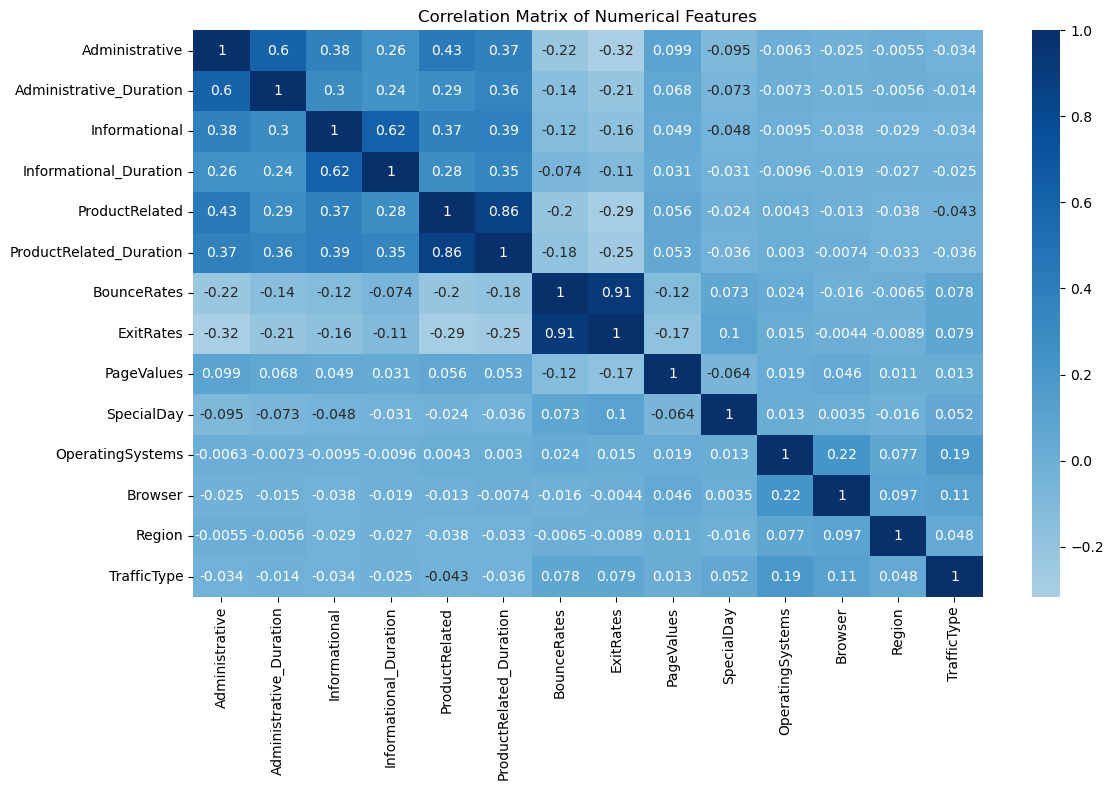

In [27]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Create correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.savefig('../reports/figures/Task_2/correlation_matrix.png')
plt.show()

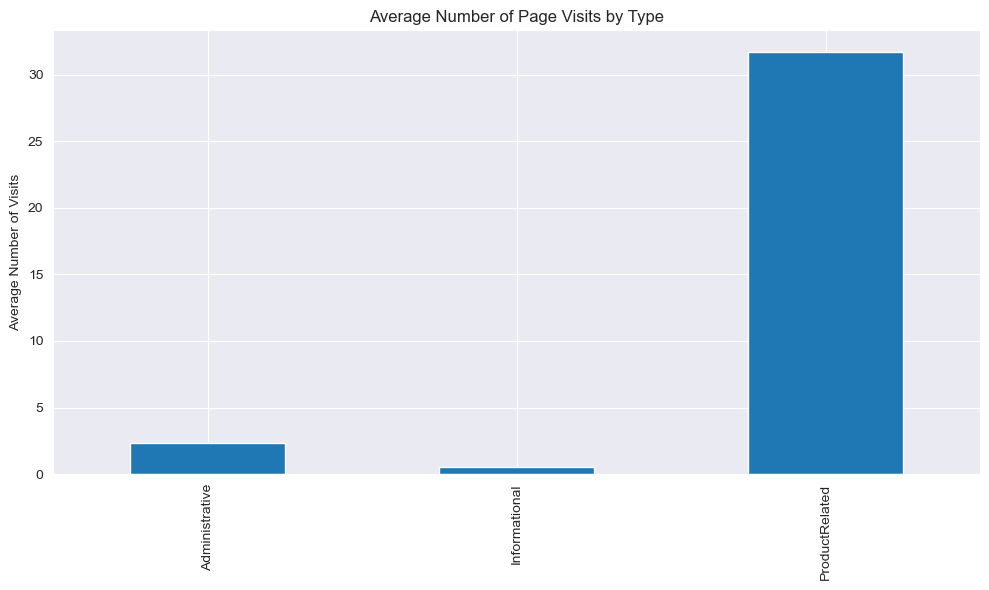

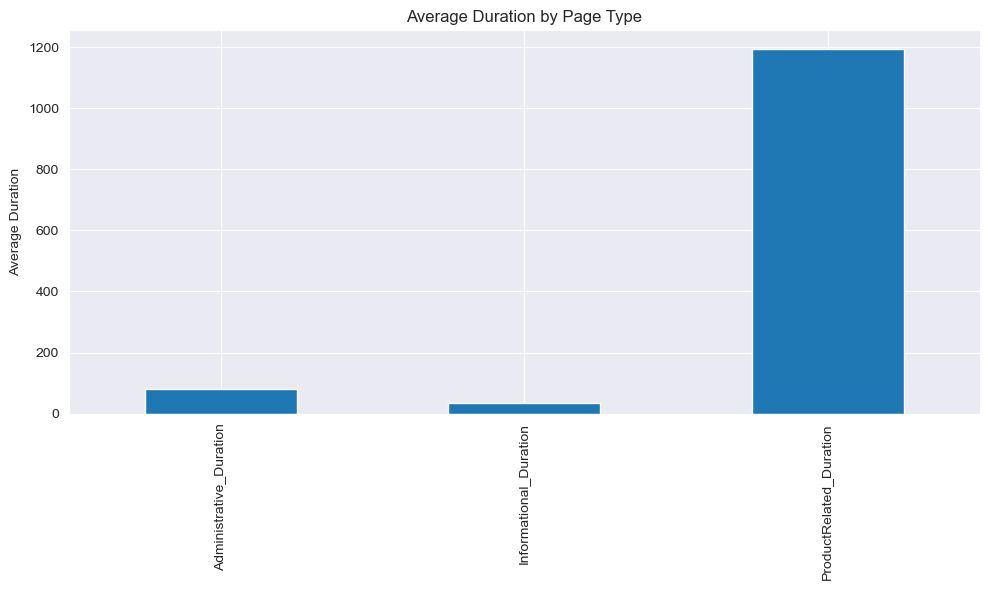

In [21]:
# Create a comparison of different page types
page_metrics = df[['Administrative', 'Informational', 'ProductRelated']].mean()
plt.figure(figsize=(10, 6))
page_metrics.plot(kind='bar')
plt.title('Average Number of Page Visits by Type')
plt.ylabel('Average Number of Visits')
plt.tight_layout()
plt.show()

# Duration analysis
duration_metrics = df[['Administrative_Duration', 'Informational_Duration', 
                      'ProductRelated_Duration']].mean()
plt.figure(figsize=(10, 6))
duration_metrics.plot(kind='bar')
plt.title('Average Duration by Page Type')
plt.ylabel('Average Duration')
plt.tight_layout()
plt.show()

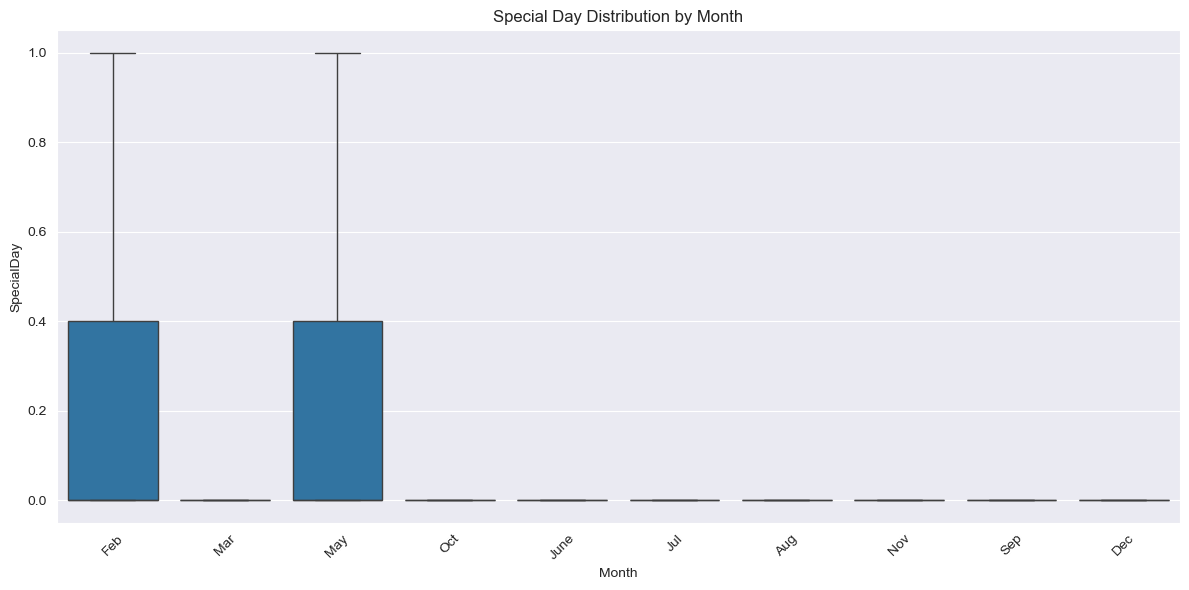

In [22]:
# Special Day distribution by Month
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Month', y='SpecialDay')
plt.title('Special Day Distribution by Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [24]:
# Summary statistics for numerical variables by visitor type
print("Summary statistics by visitor type:\n")
print(df.groupby('VisitorType')[numerical_cols].mean())

# Summary statistics for weekend vs weekday
print("\nSummary statistics by weekend:")
print(df.groupby('Weekend')[numerical_cols].mean())

Summary statistics by visitor type:

                   Administrative  Administrative_Duration  Informational  \
VisitorType                                                                 
New_Visitor              2.551948                91.911315       0.333530   
Other                    1.470588                62.695588       0.176471   
Returning_Visitor        2.283954                79.183639       0.533504   

                   Informational_Duration  ProductRelated  \
VisitorType                                                 
New_Visitor                     19.237472       18.054900   
Other                           11.685490       12.470588   
Returning_Visitor               37.101992       34.082457   

                   ProductRelated_Duration  BounceRates  ExitRates  \
VisitorType                                                          
New_Visitor                     636.393354     0.005261   0.020681   
Other                           570.404862     0.038551   0.0

Session Duration Statistics:
count    12330.000000
mean      1310.037228
std       2037.801702
min          0.000000
25%        222.000000
50%        680.000000
75%       1626.908333
max      69921.647230
Name: TotalDuration, dtype: float64


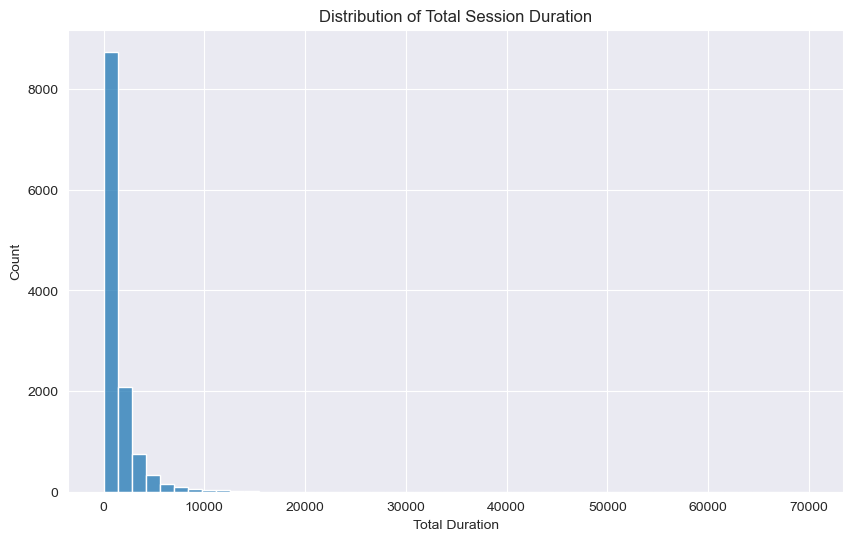

In [25]:
# Calculate and display session duration statistics
df['TotalDuration'] = (df['Administrative_Duration'] + 
                       df['Informational_Duration'] + 
                       df['ProductRelated_Duration'])

print("Session Duration Statistics:")
print(df['TotalDuration'].describe())

# Visualize total duration distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='TotalDuration', bins=50)
plt.title('Distribution of Total Session Duration')
plt.xlabel('Total Duration')
plt.show()

### 3.Data Preparation

#### 3.1 Feature selection

In [22]:
df.shape

(12330, 18)

In [28]:
# 3.2 Feature Analysis and Selection
feature_analysis = {
    'Behavioral Features': [
        'Administrative', 'Administrative_Duration',
        'Informational', 'Informational_Duration',
        'ProductRelated', 'ProductRelated_Duration'
    ],
    'Engagement Metrics': [
        'BounceRates', 'ExitRates', 'PageValues'
    ],
    'Temporal Features': [
        'SpecialDay', 'Month', 'Weekend'
    ],
    'User/Technical Features': [
        'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType'
    ],
    'Target (To be removed)': [
        'Revenue'  # This feature was used for classification in orginal dataset thus it will be removed from the dataset in this analysis.
    ]
}

# Print feature categories
for category, features in feature_analysis.items():
    print(f"\n{category}:")
    for feature in features:
        print(f"- {feature}")


Behavioral Features:
- Administrative
- Administrative_Duration
- Informational
- Informational_Duration
- ProductRelated
- ProductRelated_Duration

Engagement Metrics:
- BounceRates
- ExitRates
- PageValues

Temporal Features:
- SpecialDay
- Month
- Weekend

User/Technical Features:
- OperatingSystems
- Browser
- Region
- TrafficType
- VisitorType

Target (To be removed):
- Revenue


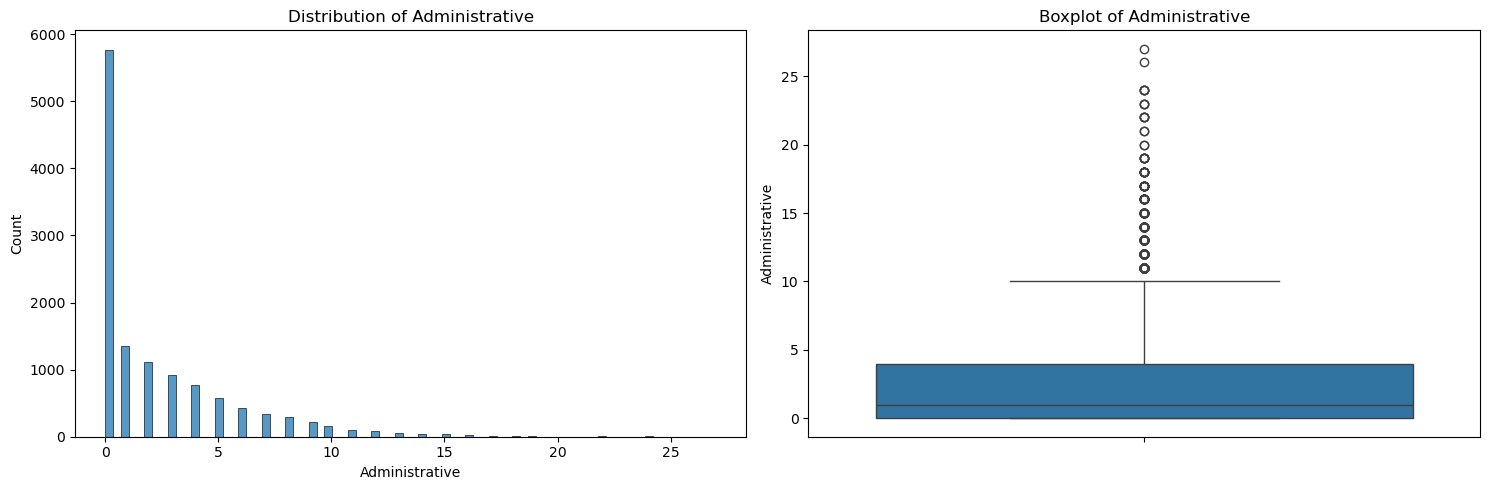

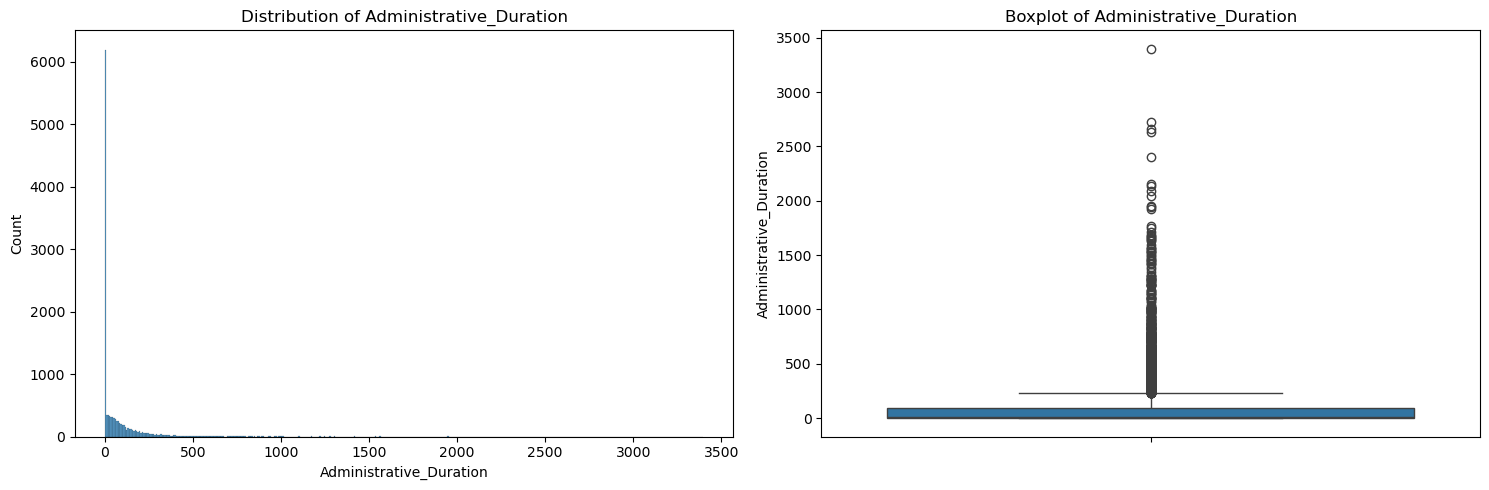

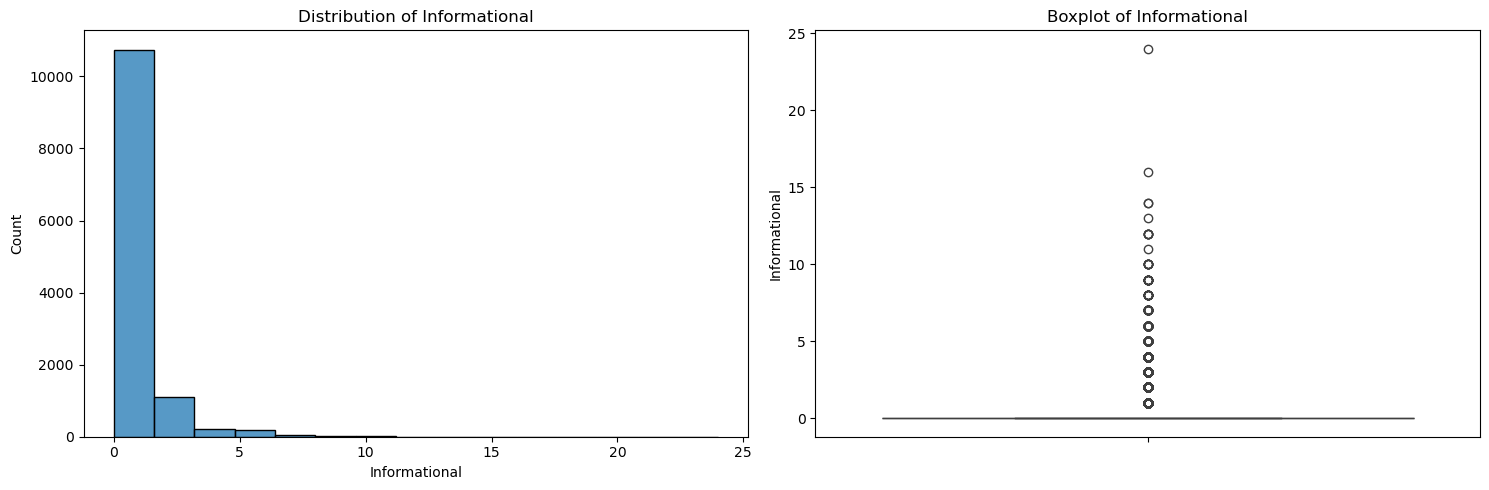

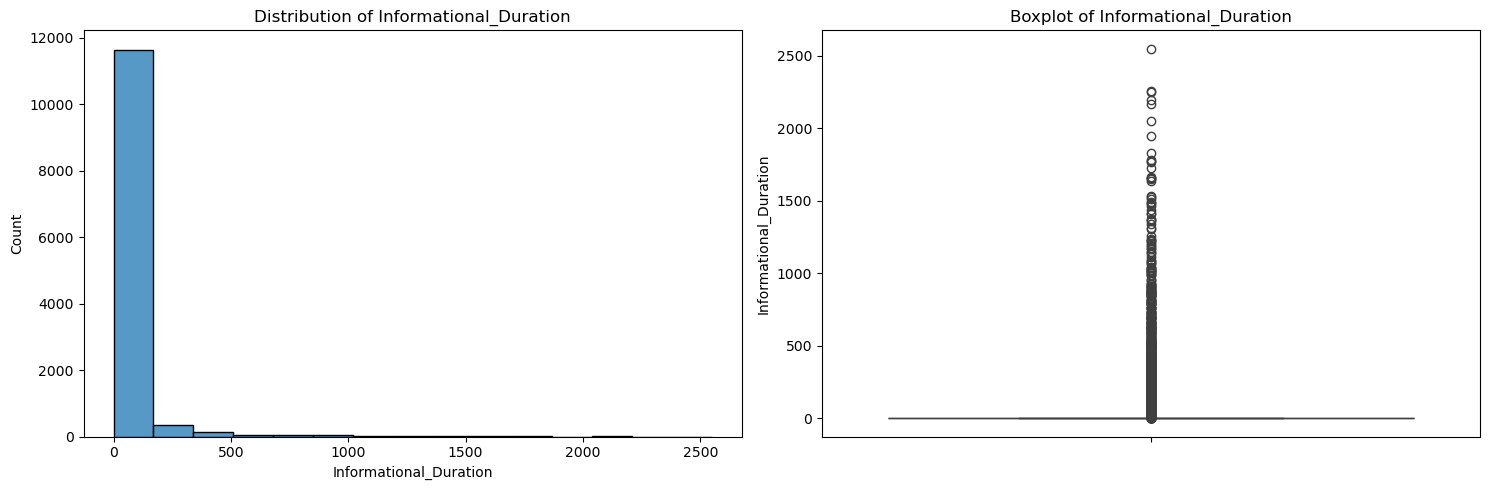

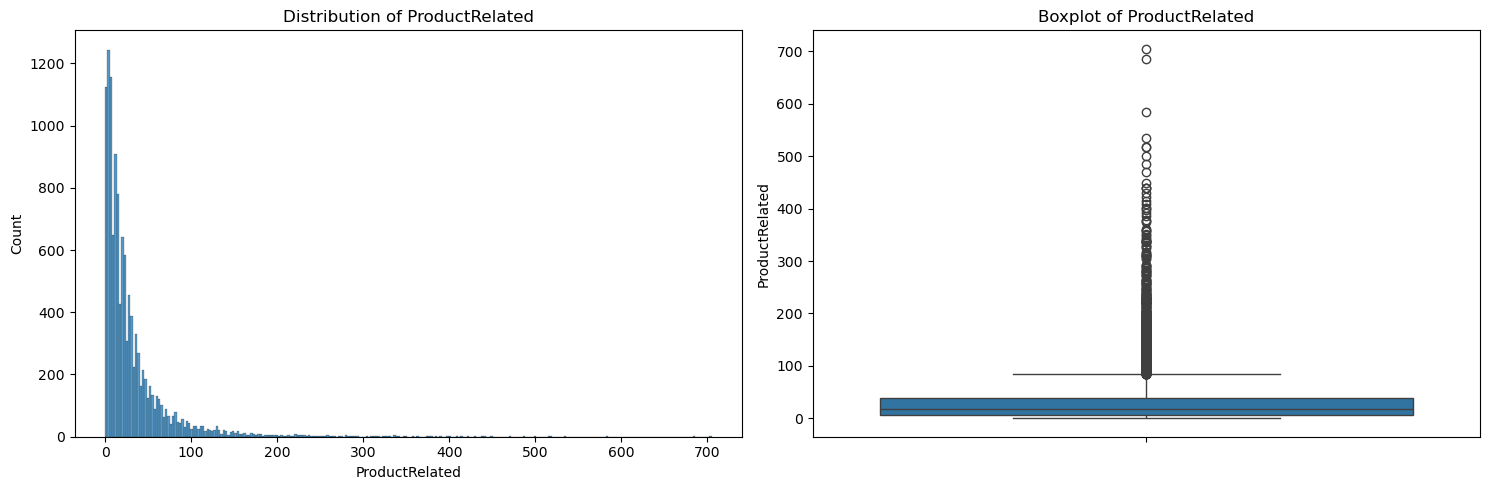

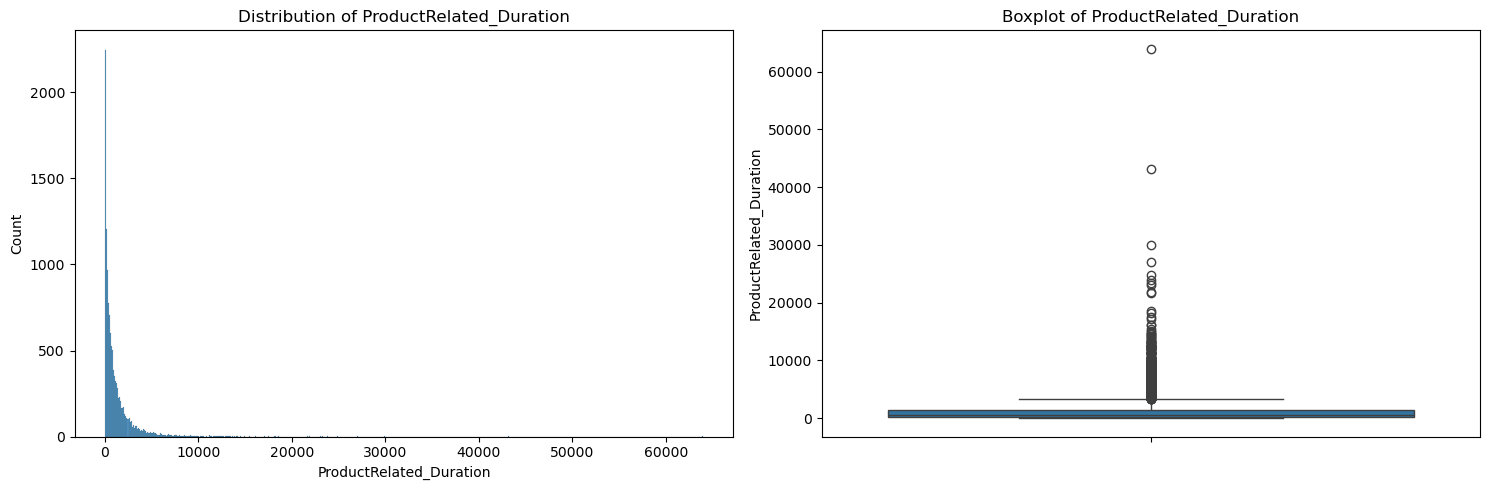

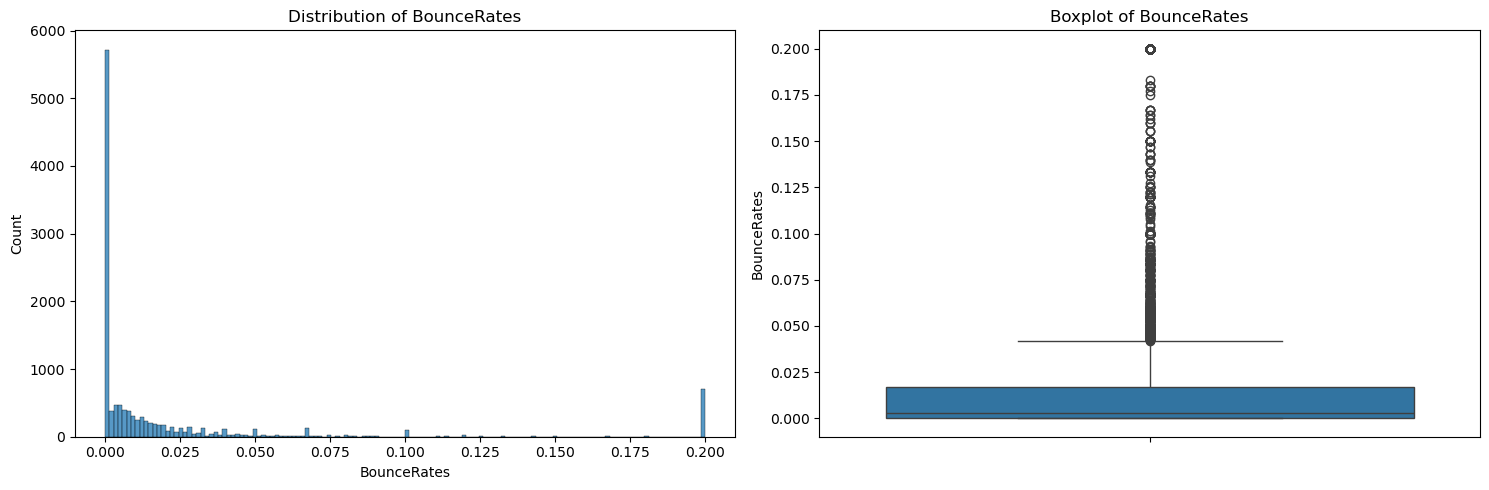

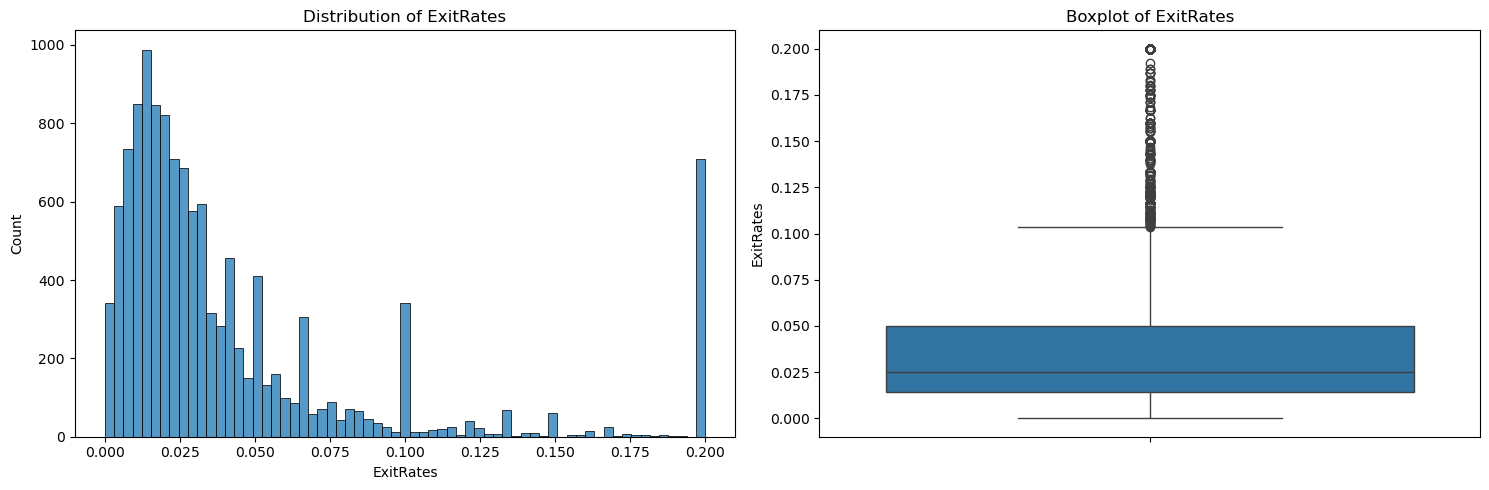

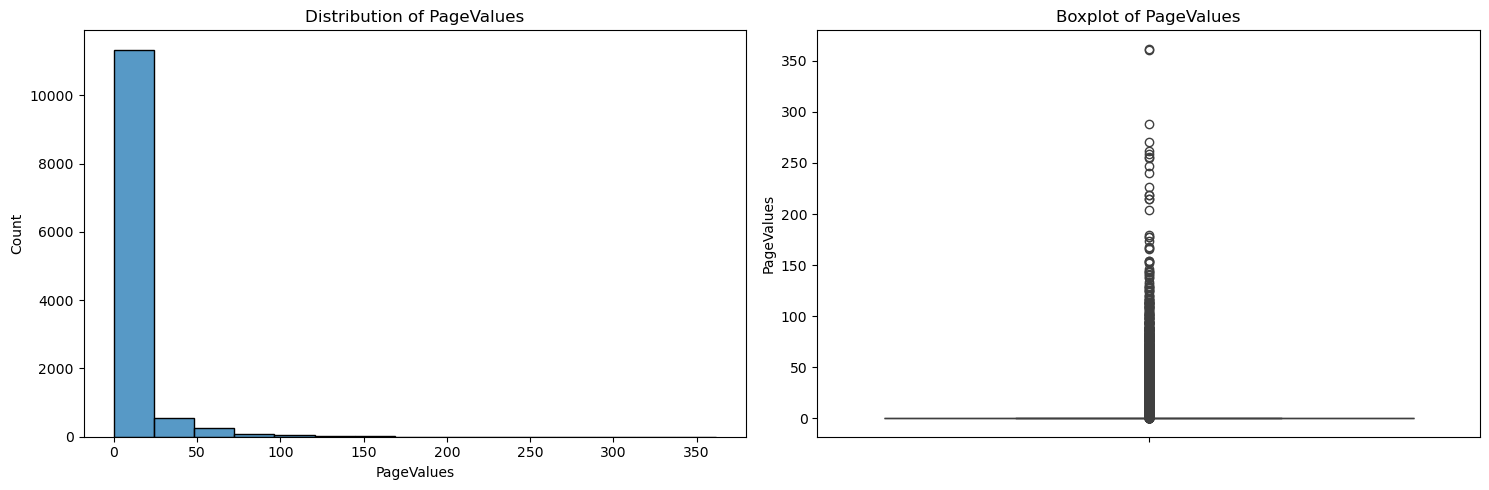

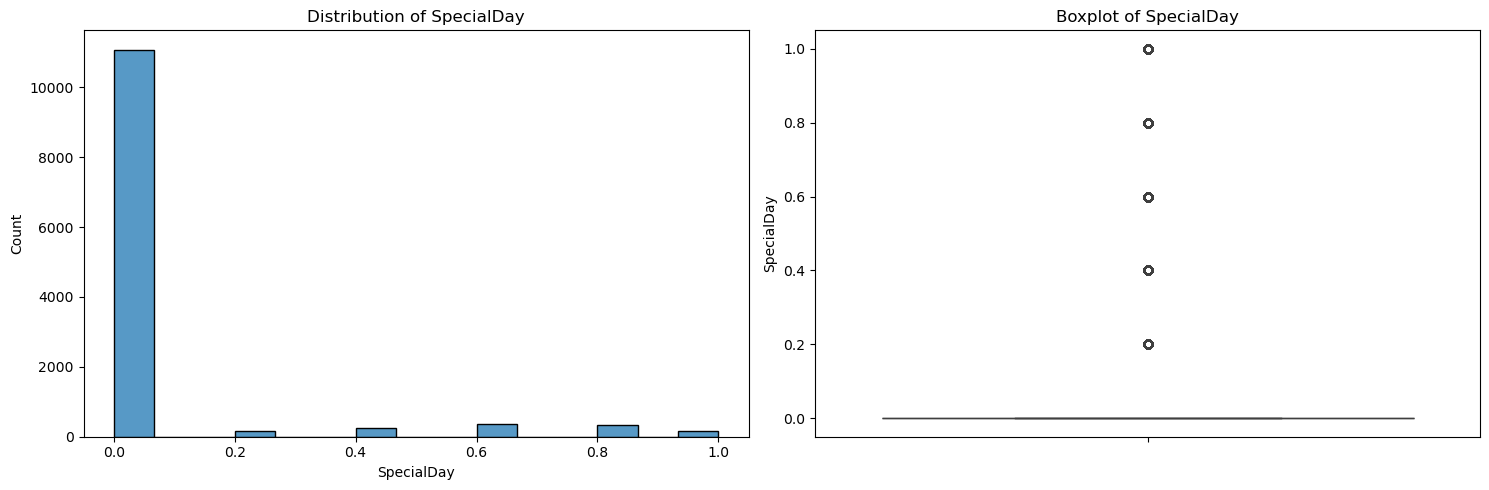

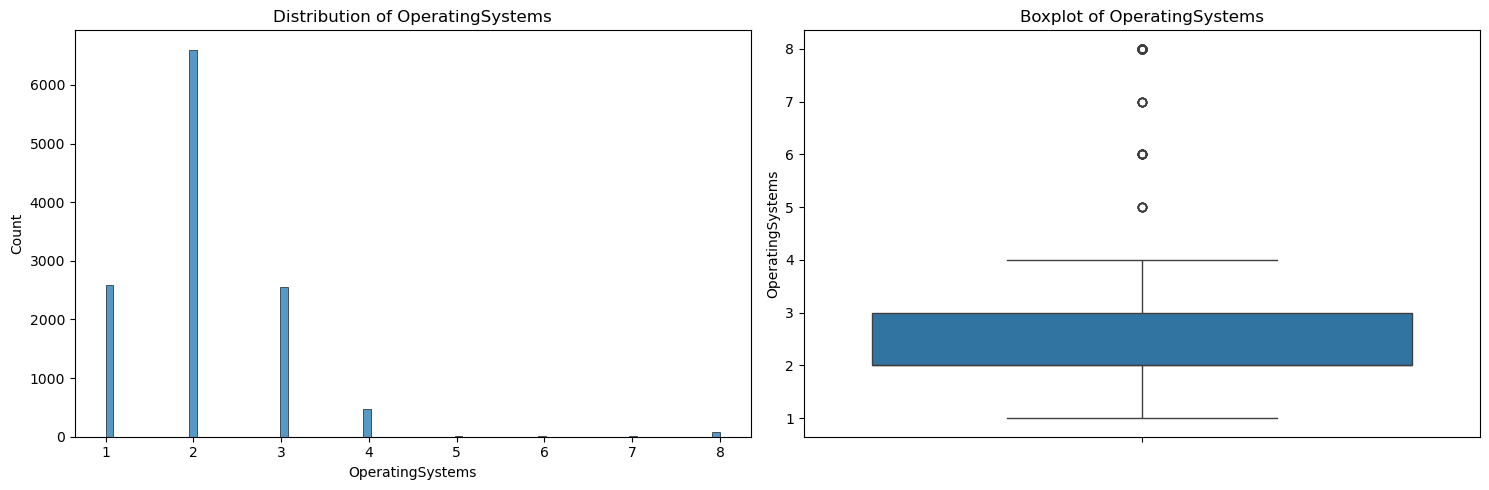

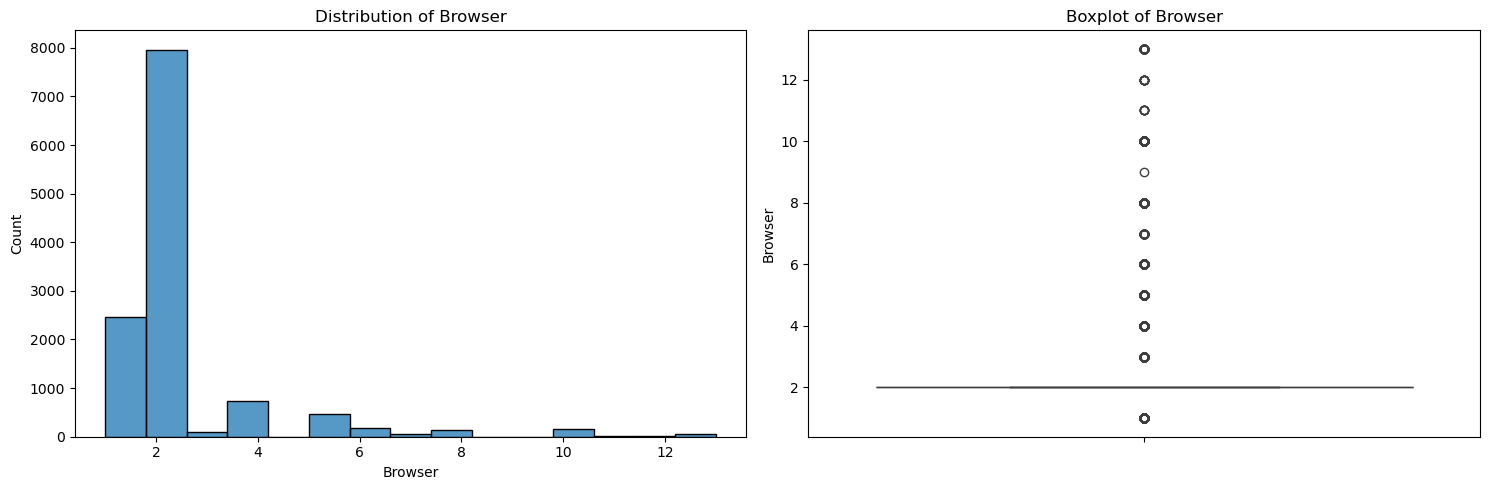

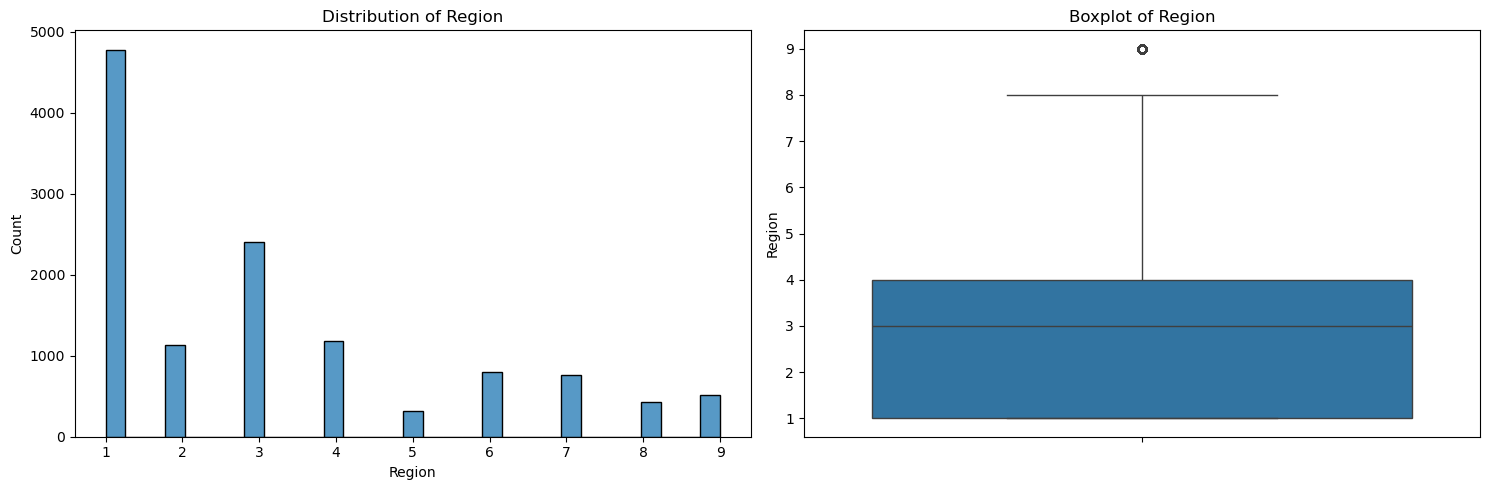

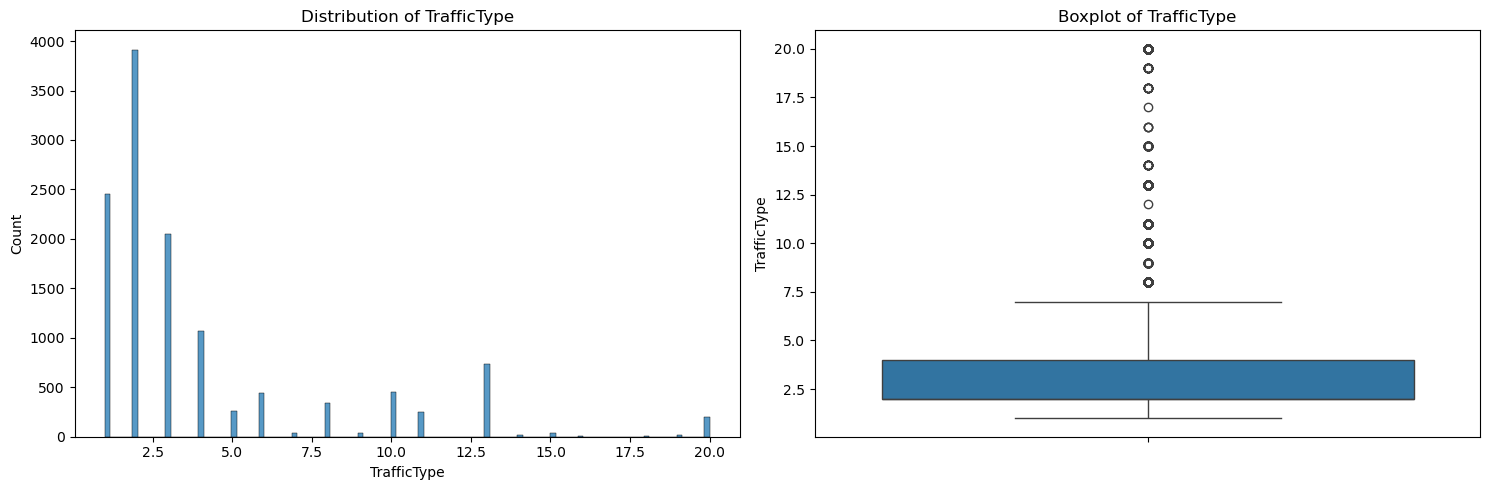

In [31]:
# 3.4 Handle Outliers
def plot_feature_distributions(df, features):
    """
    Plot distributions and boxplots for features
    """
    for feature in features:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
        
        # Distribution plot
        sns.histplot(df[feature], ax=ax1)
        ax1.set_title(f'Distribution of {feature}')
        
        # Boxplot
        sns.boxplot(y=df[feature], ax=ax2)
        ax2.set_title(f'Boxplot of {feature}')
        
        plt.tight_layout()
        plt.show()

# Analyze numerical features for outliers
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
plot_feature_distributions(df, numerical_features)

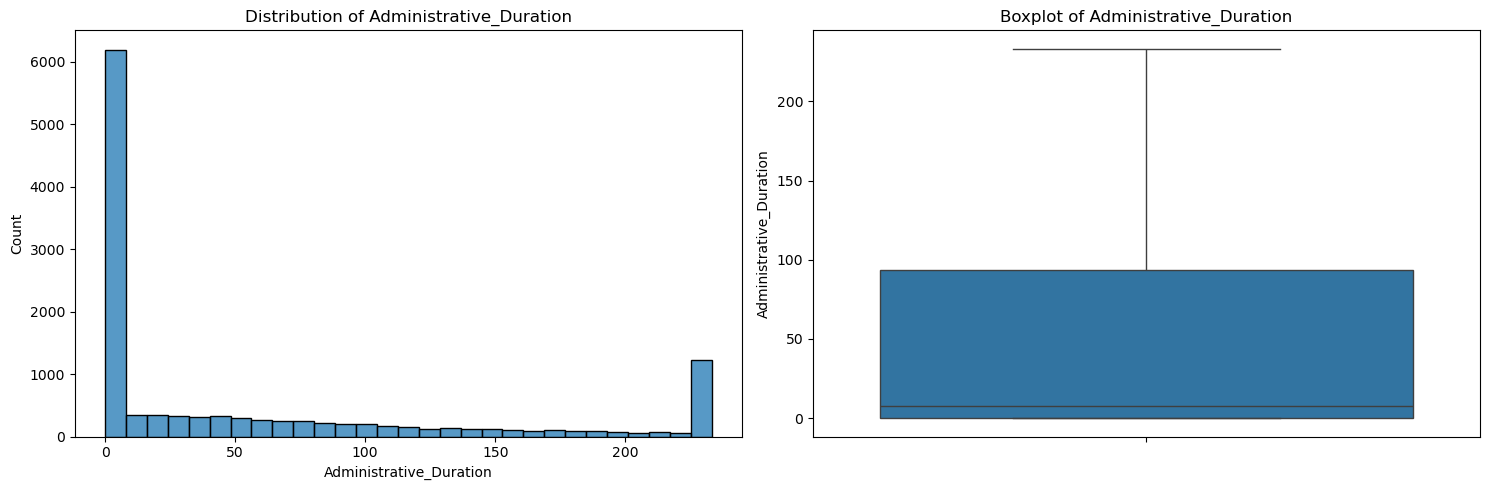

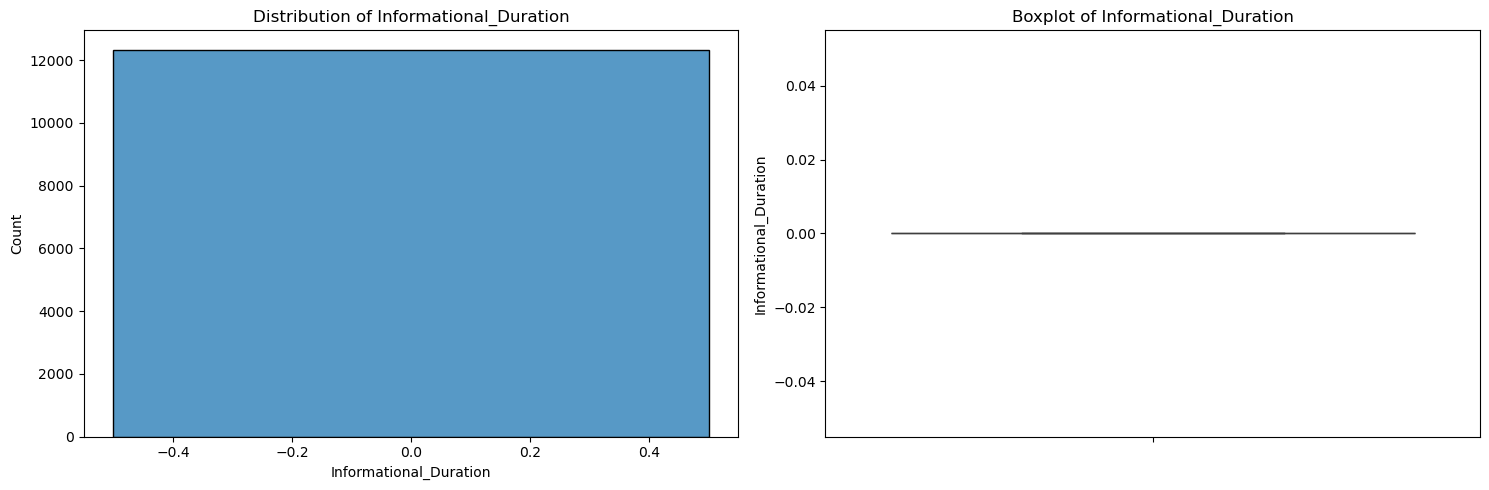

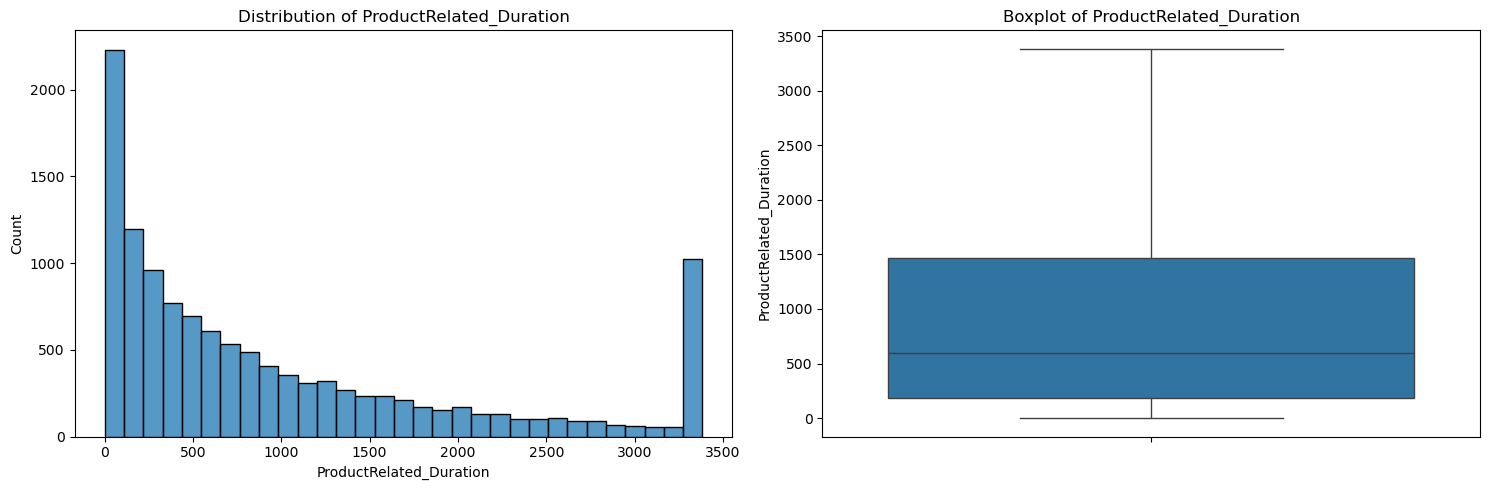

In [32]:
# 3.5 Handle outliers using IQR method
def handle_outliers(df, columns, method='iqr'):
    """
    Handle outliers in specified columns
    method: 'iqr' or 'zscore'
    """
    df_clean = df.copy()
    
    for col in columns:
        if method == 'iqr':
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Cap the outliers
            df_clean[col] = df_clean[col].clip(lower=lower_bound, upper=upper_bound)
    
    return df_clean

# Handle outliers in duration-related features
duration_features = [col for col in numerical_features if 'Duration' in col]
df_cleaned = handle_outliers(df, duration_features)

# Verify outlier handling
plot_feature_distributions(df_cleaned, duration_features)

In [33]:
# 3.6 Feature Engineering
def create_engagement_features(df):
    """
    Create new features capturing user engagement patterns
    """
    df = df.copy()
    
    # Session-level metrics
    df['total_duration'] = (df['Administrative_Duration'] + 
                          df['Informational_Duration'] + 
                          df['ProductRelated_Duration'])
    
    df['avg_time_per_page'] = df['total_duration'] / (
        df['Administrative'] + df['Informational'] + df['ProductRelated'] + 1
    )
    
    # Page type preferences
    total_pages = df['Administrative'] + df['Informational'] + df['ProductRelated'] + 1
    df['admin_ratio'] = df['Administrative'] / total_pages
    df['info_ratio'] = df['Informational'] / total_pages
    df['product_ratio'] = df['ProductRelated'] / total_pages
    
    # Duration distributions
    df['admin_duration_ratio'] = df['Administrative_Duration'] / (df['total_duration'] + 1)
    df['info_duration_ratio'] = df['Informational_Duration'] / (df['total_duration'] + 1)
    df['product_duration_ratio'] = df['ProductRelated_Duration'] / (df['total_duration'] + 1)
    
    return df

# Apply feature engineering
df_engineered = create_engagement_features(df_cleaned)

# Display new features
new_features = [col for col in df_engineered.columns if col not in df.columns]
print("\nNewly created features:")
print(df_engineered[new_features].head())


Newly created features:
   total_duration  avg_time_per_page  admin_ratio  info_ratio  product_ratio  \
0        0.000000           0.000000          0.0         0.0       0.500000   
1       64.000000          21.333333          0.0         0.0       0.666667   
2        0.000000           0.000000          0.0         0.0       0.500000   
3        2.666667           0.888889          0.0         0.0       0.666667   
4      627.500000          57.045455          0.0         0.0       0.909091   

   admin_duration_ratio  info_duration_ratio  product_duration_ratio  
0                   0.0                  0.0                0.000000  
1                   0.0                  0.0                0.984615  
2                   0.0                  0.0                0.000000  
3                   0.0                  0.0                0.727273  
4                   0.0                  0.0                0.998409  


In [34]:
# 3.7 Encode Categorical Variables
def encode_categorical_features(df):
    """
    Encode categorical variables appropriately
    """
    df = df.copy()
    
    # One-hot encode Month
    df = pd.get_dummies(df, columns=['Month'], prefix='month')
    
    # Label encode VisitorType
    visitor_map = {'Returning_Visitor': 2, 'New_Visitor': 1, 'Other': 0}
    df['VisitorType'] = df['VisitorType'].map(visitor_map)
    
    # Convert boolean to int
    df['Weekend'] = df['Weekend'].astype(int)
    
    return df

df_encoded = encode_categorical_features(df_engineered)

In [36]:
df_encoded.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  OperatingSystems         12330 non-null  int64  
 11  Browser                  12330 non-null  int64  
 12  Region                   12330 non-null  int64  
 13  TrafficType              12330 non-null  int64  
 14  VisitorType           

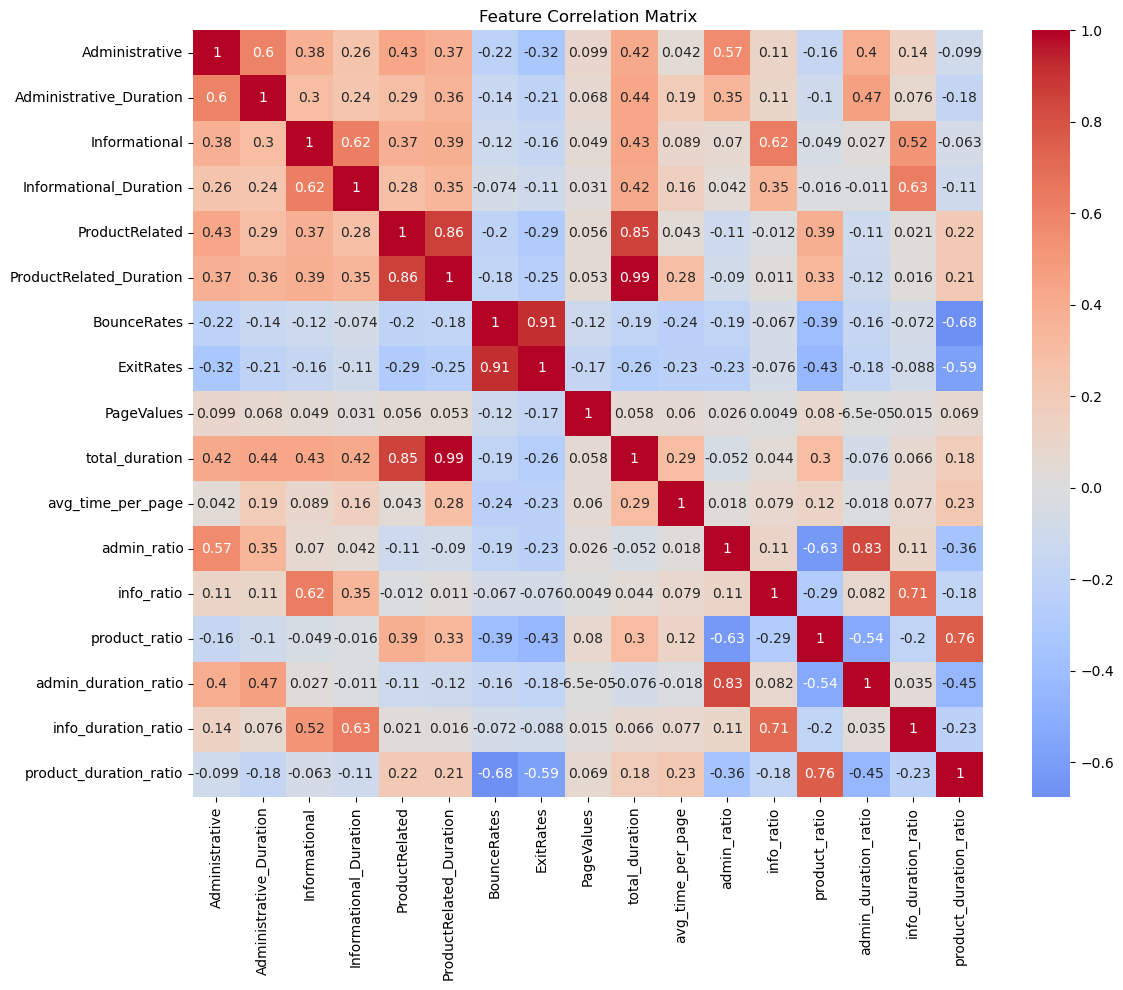

In [39]:
# First, let's create our engineered features
def create_engineered_features(df):
    """
    Create engineered features for the dataset
    """
    df = df.copy()
    
    # Create total duration
    df['total_duration'] = (df['Administrative_Duration'] + 
                          df['Informational_Duration'] + 
                          df['ProductRelated_Duration'])
    
    # Create average time per page
    df['avg_time_per_page'] = df['total_duration'] / (
        df['Administrative'] + df['Informational'] + df['ProductRelated'] + 1
    )
    
    # Create page type ratios
    total_pages = df['Administrative'] + df['Informational'] + df['ProductRelated'] + 1
    df['admin_ratio'] = df['Administrative'] / total_pages
    df['info_ratio'] = df['Informational'] / total_pages
    df['product_ratio'] = df['ProductRelated'] / total_pages
    
    # Create duration ratios
    total_duration = df['total_duration'] + 1  # Add 1 to avoid division by zero
    df['admin_duration_ratio'] = df['Administrative_Duration'] / total_duration
    df['info_duration_ratio'] = df['Informational_Duration'] / total_duration
    df['product_duration_ratio'] = df['ProductRelated_Duration'] / total_duration
    
    return df

# Apply feature engineering
df = create_engineered_features(df)

# Now let's proceed with correlation analysis
numerical_features = [
    'Administrative', 'Administrative_Duration',
    'Informational', 'Informational_Duration',
    'ProductRelated', 'ProductRelated_Duration',
    'BounceRates', 'ExitRates', 'PageValues',
    'total_duration', 'avg_time_per_page',
    'admin_ratio', 'info_ratio', 'product_ratio',
    'admin_duration_ratio', 'info_duration_ratio', 
    'product_duration_ratio'
]

# Create correlation matrix
correlation_matrix = df[numerical_features].corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.savefig('../reports/figures/Task_2/correlation_matrix.png')
plt.show()

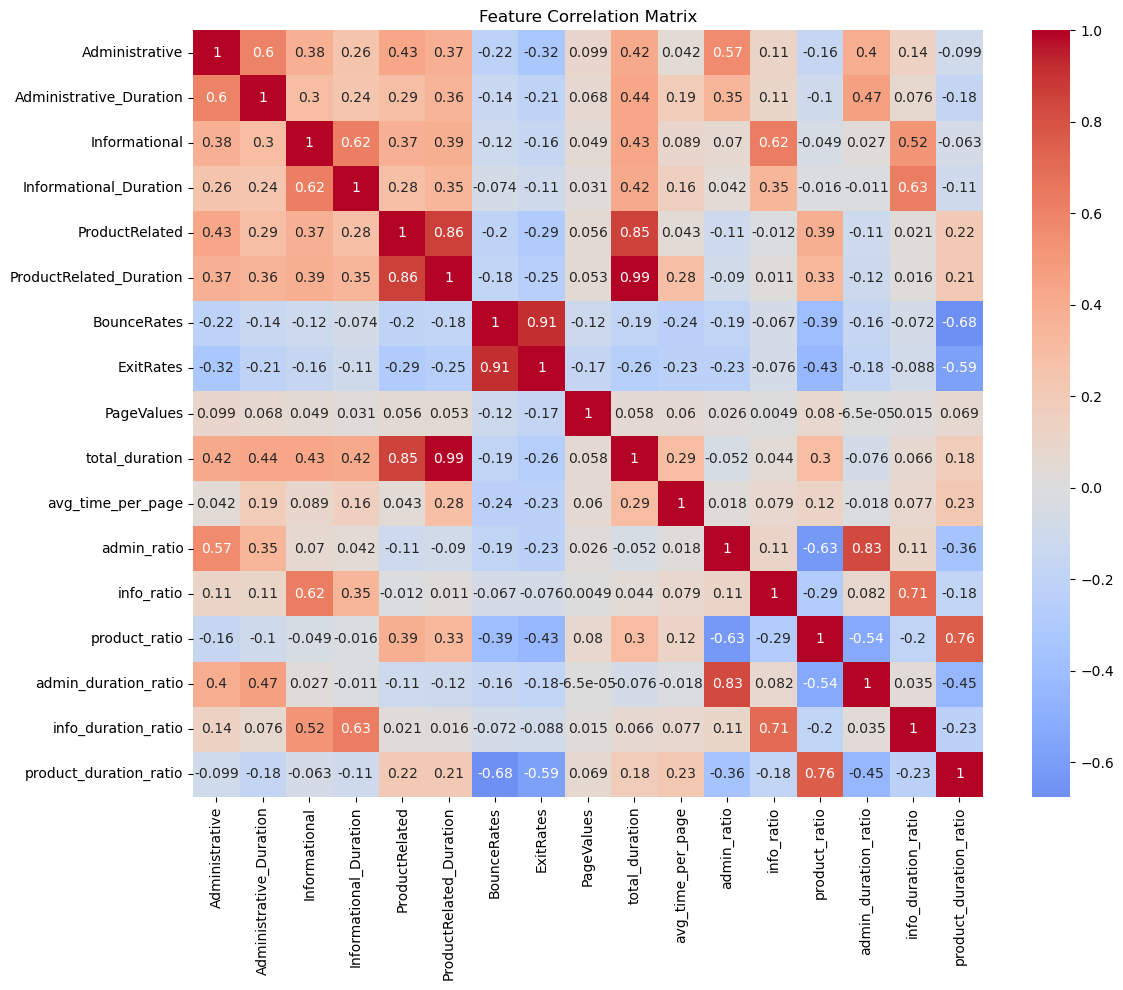

High correlation (0.861): ('ProductRelated_Duration', 'ProductRelated')
High correlation (0.913): ('ExitRates', 'BounceRates')
High correlation (0.853): ('total_duration', 'ProductRelated')
High correlation (0.994): ('total_duration', 'ProductRelated_Duration')


In [40]:
# Feature Selection and Dimensionality Reduction
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# First, let's separate our numerical features for correlation analysis
numerical_features = [
    'Administrative', 'Administrative_Duration',
    'Informational', 'Informational_Duration',
    'ProductRelated', 'ProductRelated_Duration',
    'BounceRates', 'ExitRates', 'PageValues',
    'total_duration', 'avg_time_per_page',
    'admin_ratio', 'info_ratio', 'product_ratio',
    'admin_duration_ratio', 'info_duration_ratio', 
    'product_duration_ratio'
]

# Create correlation matrix
correlation_matrix = df[numerical_features].corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.savefig('../reports/figures/Task_2/correlation_matrix.png')
plt.show()

# Identify highly correlated features (threshold = 0.85)
def identify_correlated_features(correlation_matrix, threshold=0.85):
    correlated_features = set()
    
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > threshold:
                feature_pair = (correlation_matrix.columns[i], correlation_matrix.columns[j])
                print(f"High correlation ({correlation_matrix.iloc[i, j]:.3f}): {feature_pair}")
                correlated_features.add(correlation_matrix.columns[i])
    
    return list(correlated_features)

# Get highly correlated features
high_corr_features = identify_correlated_features(correlation_matrix)

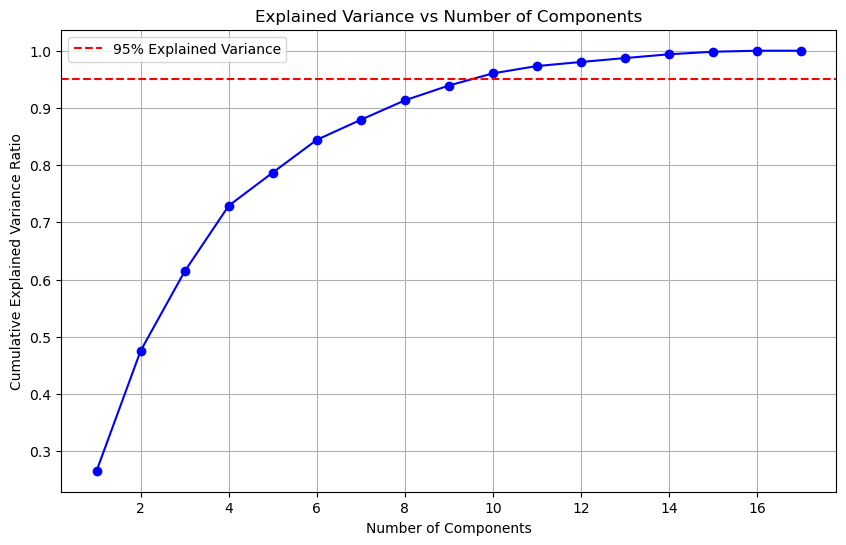

Number of components needed for 95% variance: 10


In [41]:
# Apply PCA to numerical features
# First, scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[numerical_features])

# Apply PCA
pca = PCA()
pca_result = pca.fit_transform(scaled_features)

# Calculate explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance vs Number of Components')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Explained Variance')
plt.legend()
plt.grid(True)
plt.savefig('../reports/figures/Task_2/pca_explained_variance.png')
plt.show()

# Determine optimal number of components
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components needed for 95% variance: {n_components}")

Explained variance ratio by component:
PC1: 0.266 (26.6%)
Top contributing features:
total_duration             0.401205
ProductRelated_Duration    0.384649
ProductRelated             0.363149
Name: PC1, dtype: float64

PC2: 0.210 (21.0%)
Top contributing features:
product_ratio             0.451146
product_duration_ratio    0.417821
admin_ratio               0.384170
Name: PC2, dtype: float64

PC3: 0.139 (13.9%)
Top contributing features:
admin_duration_ratio    0.376651
admin_ratio             0.375417
BounceRates             0.364904
Name: PC3, dtype: float64

PC4: 0.115 (11.5%)
Top contributing features:
info_duration_ratio    0.396656
info_ratio             0.388187
BounceRates            0.367274
Name: PC4, dtype: float64

PC5: 0.058 (5.8%)
Top contributing features:
avg_time_per_page    0.873848
PageValues           0.279518
ProductRelated       0.221817
Name: PC5, dtype: float64

PC6: 0.057 (5.7%)
Top contributing features:
PageValues           0.943757
avg_time_per_page    0.2

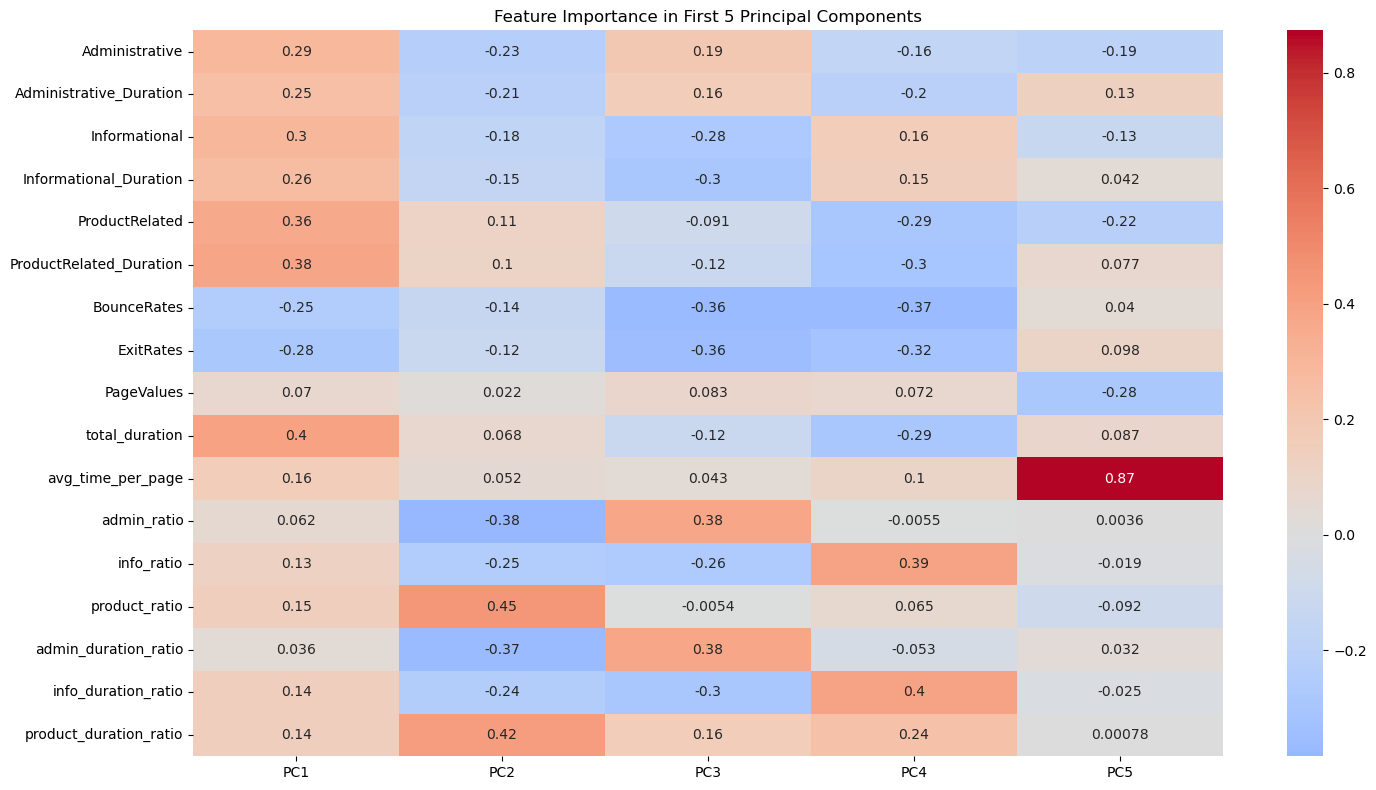

In [42]:
import joblib


def create_final_feature_set(df, n_components=10):
    """
    Create final feature set for clustering with:
    1. Numerical features through PCA
    2. Categorical features preserved
    """
    # Separate numerical and categorical features
    numerical_features = [
        'Administrative', 'Administrative_Duration',
        'Informational', 'Informational_Duration',
        'ProductRelated', 'ProductRelated_Duration',
        'BounceRates', 'ExitRates', 'PageValues',
        'total_duration', 'avg_time_per_page',
        'admin_ratio', 'info_ratio', 'product_ratio',
        'admin_duration_ratio', 'info_duration_ratio', 
        'product_duration_ratio'
    ]
    
    # Scale numerical features
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(df[numerical_features])
    
    # Apply PCA
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(scaled_features)
    
    # Create DataFrame with PCA components
    pca_columns = [f'PC{i+1}' for i in range(n_components)]
    pca_df = pd.DataFrame(pca_result, columns=pca_columns)
    
    # Get top feature contributions for each component
    feature_importance = pd.DataFrame(
        pca.components_.T,
        columns=pca_columns,
        index=numerical_features
    )
    
    # Print explained variance for each component
    print("Explained variance ratio by component:")
    for i, var in enumerate(pca.explained_variance_ratio_):
        print(f"PC{i+1}: {var:.3f} ({var*100:.1f}%)")
        
        # Print top 3 contributing features
        top_features = feature_importance[f'PC{i+1}'].abs().sort_values(ascending=False)[:3]
        print("Top contributing features:")
        print(top_features)
        print()
    
    # Save the processed data
    output_path = '../data/processed/Task_2_processed/model_ready/'
    os.makedirs(output_path, exist_ok=True)
    
    # Save PCA results
    pca_df.to_csv(f'{output_path}pca_features.csv', index=False)
    joblib.dump(pca, f'{output_path}pca_model.pkl')
    joblib.dump(scaler, f'{output_path}scaler_model.pkl')
    
    # Save feature importance
    feature_importance.to_csv(f'{output_path}feature_importance.csv')
    
    return pca_df, pca, scaler, feature_importance

# Create final dataset
pca_df, pca_model, scaler_model, feature_importance = create_final_feature_set(df)

# Visualize feature importance for first few components
plt.figure(figsize=(15, 8))
sns.heatmap(feature_importance.iloc[:, :5], annot=True, cmap='coolwarm', center=0)
plt.title('Feature Importance in First 5 Principal Components')
plt.tight_layout()
plt.savefig('../reports/figures/Task_2/pca_feature_importance.png')
plt.show()

In [43]:
def prepare_final_features(df, n_components=6):
    """
    Prepare final feature set with reduced PCA components
    """
    # Select numerical features for PCA
    numerical_features = [
        'Administrative', 'Administrative_Duration',
        'Informational', 'Informational_Duration',
        'ProductRelated', 'ProductRelated_Duration',
        'BounceRates', 'ExitRates', 'PageValues',
        'total_duration', 'avg_time_per_page',
        'admin_ratio', 'info_ratio', 'product_ratio',
        'admin_duration_ratio', 'info_duration_ratio', 
        'product_duration_ratio'
    ]
    
    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df[numerical_features])
    
    # Apply PCA
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)
    
    # Create final dataset
    columns = [f'PC{i+1}' for i in range(n_components)]
    final_df = pd.DataFrame(X_pca, columns=columns)
    
    return final_df, pca, scaler

# Create final dataset
final_df, pca_model, scaler_model = prepare_final_features(df)

# Save the processed data
output_path = '../data/processed/Task_2_processed/model_ready/'
os.makedirs(output_path, exist_ok=True)

final_df.to_csv(f'{output_path}final_features.csv', index=False)
joblib.dump(pca_model, f'{output_path}pca_model.pkl')
joblib.dump(scaler_model, f'{output_path}scaler_model.pkl')

print("Final dataset shape:", final_df.shape)

Final dataset shape: (12330, 6)


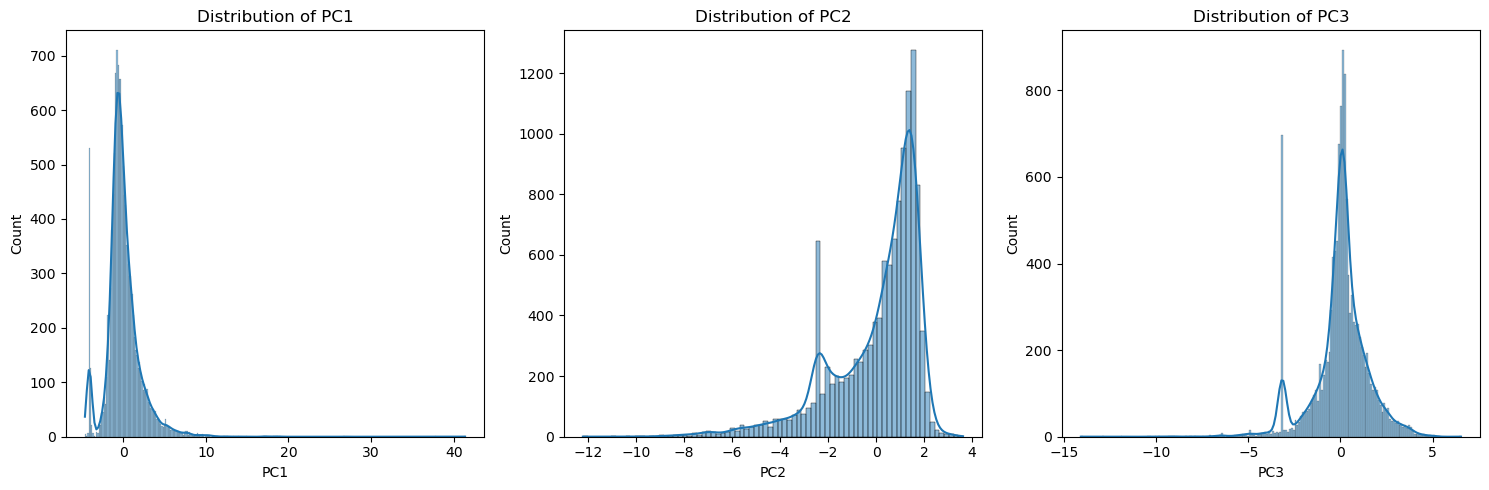

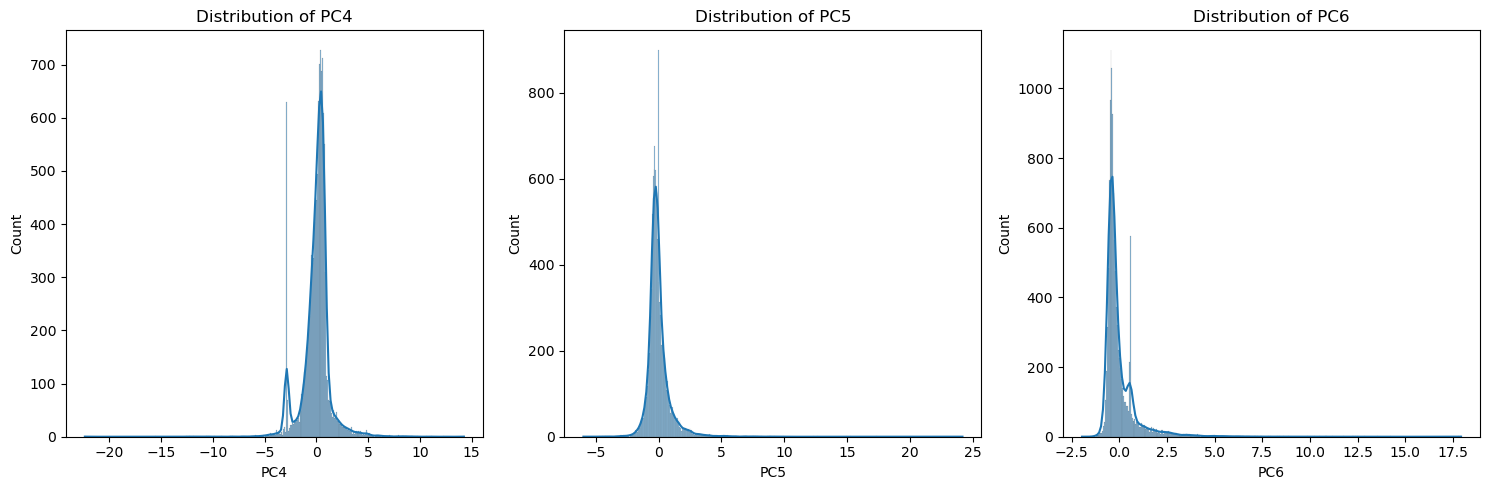

<Figure size 1200x1200 with 0 Axes>

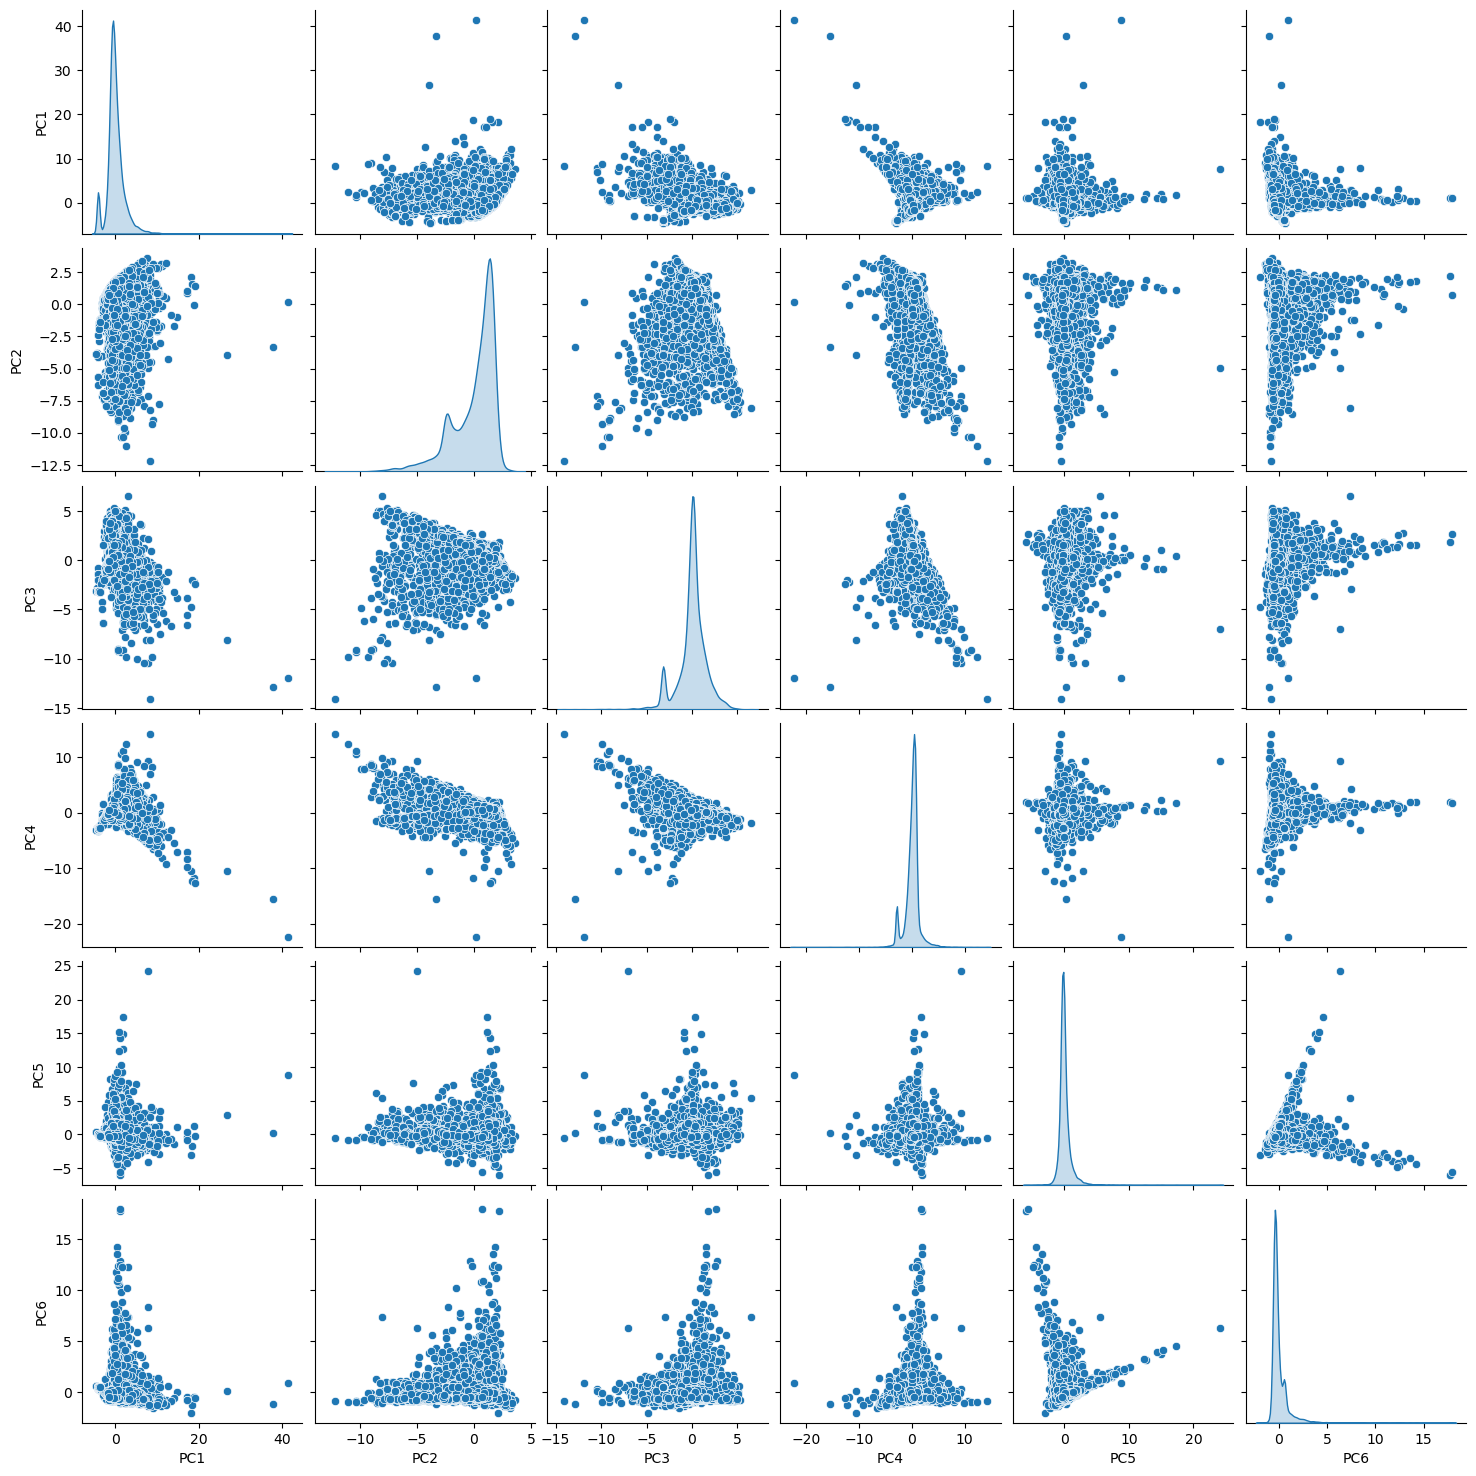


Component Statistics:
             mean       std  skewness   kurtosis
PC1  1.565784e-15  2.125496  2.482939  27.477007
PC2  3.044244e-16  1.888758 -1.497878   2.472668
PC3 -1.833399e-16  1.535994 -0.930120   4.152934
PC4  2.490708e-16  1.396523 -0.436240  14.777834
PC5 -7.761657e-17  0.992526  4.811994  64.093485
PC6 -5.608742e-17  0.986650  5.435522  52.403561


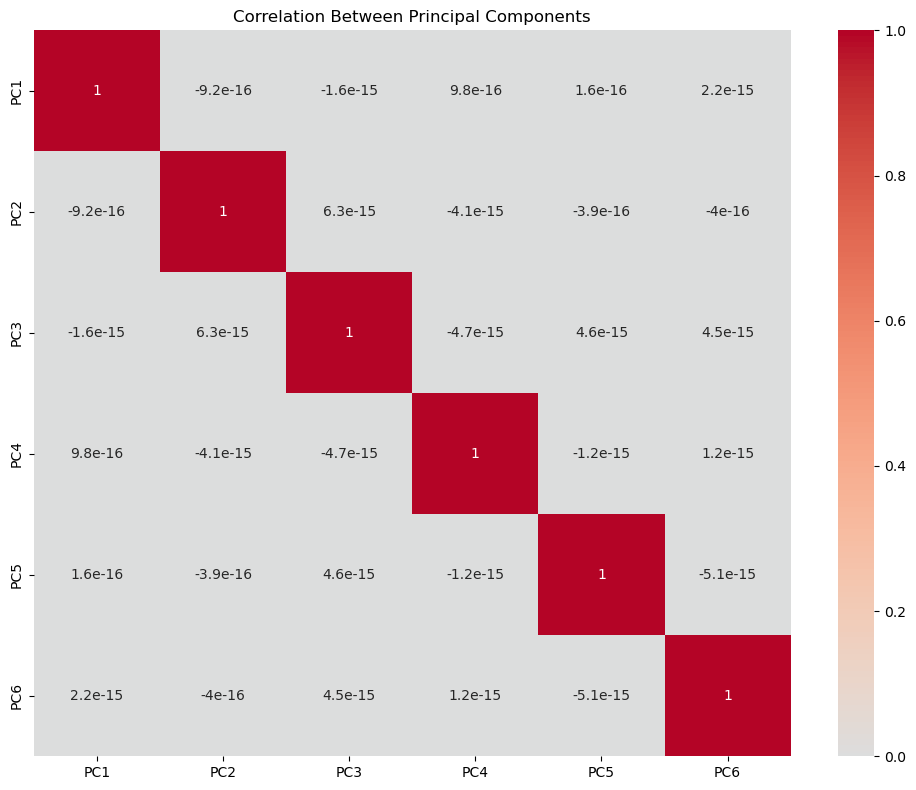


Component Interpretation Summary:

PC1:
Variance Explained: 26.6%
Interpretation: Overall engagement (duration and product activity)
Key Features: total_duration, ProductRelated_Duration, ProductRelated

PC2:
Variance Explained: 21.0%
Interpretation: Page type preferences
Key Features: product_ratio, product_duration_ratio, admin_ratio

PC3:
Variance Explained: 13.9%
Interpretation: Administrative behavior and bounce patterns
Key Features: admin_duration_ratio, admin_ratio, BounceRates

PC4:
Variance Explained: 11.5%
Interpretation: Information seeking behavior
Key Features: info_duration_ratio, info_ratio, BounceRates

PC5:
Variance Explained: 5.8%
Interpretation: Time efficiency
Key Features: avg_time_per_page, PageValues, ProductRelated

PC6:
Variance Explained: 5.7%
Interpretation: Value and engagement patterns
Key Features: PageValues, avg_time_per_page, BounceRates


In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew

# 1. Analyze distributions of PCA components
plt.figure(figsize=(15, 5))
for i in range(3):  # First row of components
    plt.subplot(1, 3, i+1)
    sns.histplot(final_df[f'PC{i+1}'], kde=True)
    plt.title(f'Distribution of PC{i+1}')
plt.tight_layout()
plt.savefig('../reports/figures/Task_2/pca_distributions_1.png')
plt.show()

plt.figure(figsize=(15, 5))
for i in range(3, 6):  # Second row of components
    plt.subplot(1, 3, i-2)
    sns.histplot(final_df[f'PC{i+1}'], kde=True)
    plt.title(f'Distribution of PC{i+1}')
plt.tight_layout()
plt.savefig('../reports/figures/Task_2/pca_distributions_2.png')
plt.show()

# 2. Create pairplot for PCA components
plt.figure(figsize=(12, 12))
sns.pairplot(final_df, diag_kind='kde')
plt.savefig('../reports/figures/Task_2/pca_pairplot.png')
plt.show()

# 3. Analyze component statistics
component_stats = pd.DataFrame({
    'mean': final_df.mean(),
    'std': final_df.std(),
    'skewness': final_df.apply(skew),
    'kurtosis': final_df.apply(kurtosis)
})
print("\nComponent Statistics:")
print(component_stats)

# 4. Correlation heatmap of components
plt.figure(figsize=(10, 8))
sns.heatmap(final_df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Between Principal Components')
plt.tight_layout()
plt.savefig('../reports/figures/Task_2/pca_correlations.png')
plt.show()

# 5. Create summary of components' interpretability
component_interpretation = {
    'PC1': {
        'variance_explained': pca_model.explained_variance_ratio_[0],
        'interpretation': 'Overall engagement (duration and product activity)',
        'key_features': ['total_duration', 'ProductRelated_Duration', 'ProductRelated']
    },
    'PC2': {
        'variance_explained': pca_model.explained_variance_ratio_[1],
        'interpretation': 'Page type preferences',
        'key_features': ['product_ratio', 'product_duration_ratio', 'admin_ratio']
    },
    'PC3': {
        'variance_explained': pca_model.explained_variance_ratio_[2],
        'interpretation': 'Administrative behavior and bounce patterns',
        'key_features': ['admin_duration_ratio', 'admin_ratio', 'BounceRates']
    },
    'PC4': {
        'variance_explained': pca_model.explained_variance_ratio_[3],
        'interpretation': 'Information seeking behavior',
        'key_features': ['info_duration_ratio', 'info_ratio', 'BounceRates']
    },
    'PC5': {
        'variance_explained': pca_model.explained_variance_ratio_[4],
        'interpretation': 'Time efficiency',
        'key_features': ['avg_time_per_page', 'PageValues', 'ProductRelated']
    },
    'PC6': {
        'variance_explained': pca_model.explained_variance_ratio_[5],
        'interpretation': 'Value and engagement patterns',
        'key_features': ['PageValues', 'avg_time_per_page', 'BounceRates']
    }
}

# Print component interpretation summary
print("\nComponent Interpretation Summary:")
for pc, details in component_interpretation.items():
    print(f"\n{pc}:")
    print(f"Variance Explained: {details['variance_explained']*100:.1f}%")
    print(f"Interpretation: {details['interpretation']}")
    print(f"Key Features: {', '.join(details['key_features'])}")

# Save interpretation summary
import json
with open('../reports/model_evaluations/Task_2/pca_interpretation.json', 'w') as f:
    json.dump(component_interpretation, f, indent=4)

#### 3.2 Data Preprocessing

In [46]:
# Handle extreme values in PC5 and PC6
def handle_extreme_components(df, threshold=3):
    df_clean = df.copy()
    for col in df.columns:
        mean = df[col].mean()
        std = df[col].std()
        df_clean[col] = df_clean[col].clip(
            lower=mean - threshold*std,
            upper=mean + threshold*std
        )
    return df_clean

# Apply preprocessing
final_df_clean = handle_extreme_components(final_df)

In [47]:
print("Before cleaning:")
print(final_df.describe())

Before cleaning:
                PC1           PC2           PC3           PC4           PC5  \
count  1.233000e+04  1.233000e+04  1.233000e+04  1.233000e+04  1.233000e+04   
mean   3.688137e-17  7.376275e-17  9.220344e-18  1.383052e-17  1.152543e-18   
std    2.125496e+00  1.888758e+00  1.535994e+00  1.396523e+00  9.925264e-01   
min   -4.637379e+00 -1.220426e+01 -1.409804e+01 -2.236702e+01 -5.971470e+00   
25%   -9.913049e-01 -9.377269e-01 -4.490288e-01 -4.542505e-01 -4.396821e-01   
50%   -3.024703e-01  6.764632e-01  1.107181e-01  1.962148e-01 -1.600497e-01   
75%    7.669724e-01  1.374316e+00  7.406677e-01  6.069765e-01  2.067340e-01   
max    4.137334e+01  3.617143e+00  6.545246e+00  1.423822e+01  2.417659e+01   

                PC6  
count  1.233000e+04  
mean  -3.457629e-18  
std    9.866504e-01  
min   -1.966414e+00  
25%   -4.626115e-01  
50%   -3.170408e-01  
75%    9.622821e-02  
max    1.792760e+01  


In [48]:
# Apply extreme value handling
final_df_clean = handle_extreme_components(final_df, threshold=3)

In [49]:
print("\nAfter cleaning:")
print(final_df_clean.describe())


After cleaning:
                PC1           PC2           PC3           PC4           PC5  \
count  12330.000000  12330.000000  12330.000000  12330.000000  12330.000000   
mean      -0.037056      0.020726      0.013672     -0.005286     -0.028024   
std        1.917491      1.812903      1.473097      1.263345      0.789893   
min       -4.637379     -5.666274     -4.607983     -4.189568     -2.977579   
25%       -0.991305     -0.937727     -0.449029     -0.454250     -0.439682   
50%       -0.302470      0.676463      0.110718      0.196215     -0.160050   
75%        0.766972      1.374316      0.740668      0.606976      0.206734   
max        6.376487      3.617143      4.607983      4.189568      2.977579   

                PC6  
count  12330.000000  
mean      -0.038028  
std        0.743086  
min       -1.966414  
25%       -0.462612  
50%       -0.317041  
75%        0.096228  
max        2.959951  


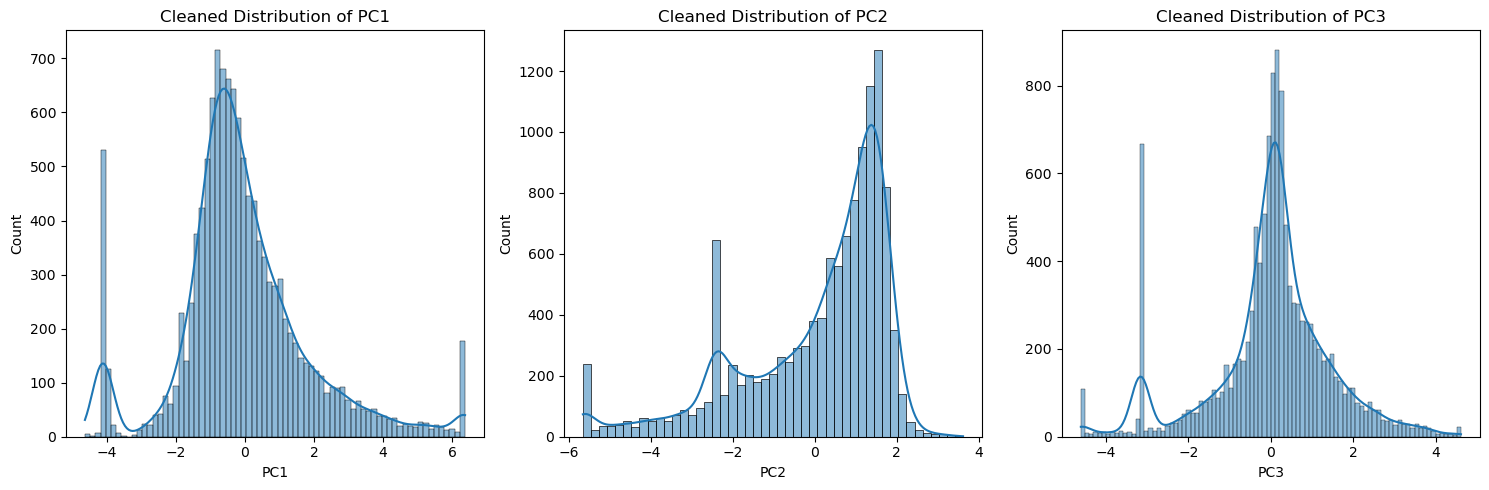

In [52]:
# 2. Visualize the cleaned distributions
plt.figure(figsize=(15, 5))
for i in range(3):
    plt.subplot(1, 3, i+1)
    sns.histplot(data=final_df_clean[f'PC{i+1}'], kde=True)
    plt.title(f'Cleaned Distribution of PC{i+1}')
plt.tight_layout()
plt.show()


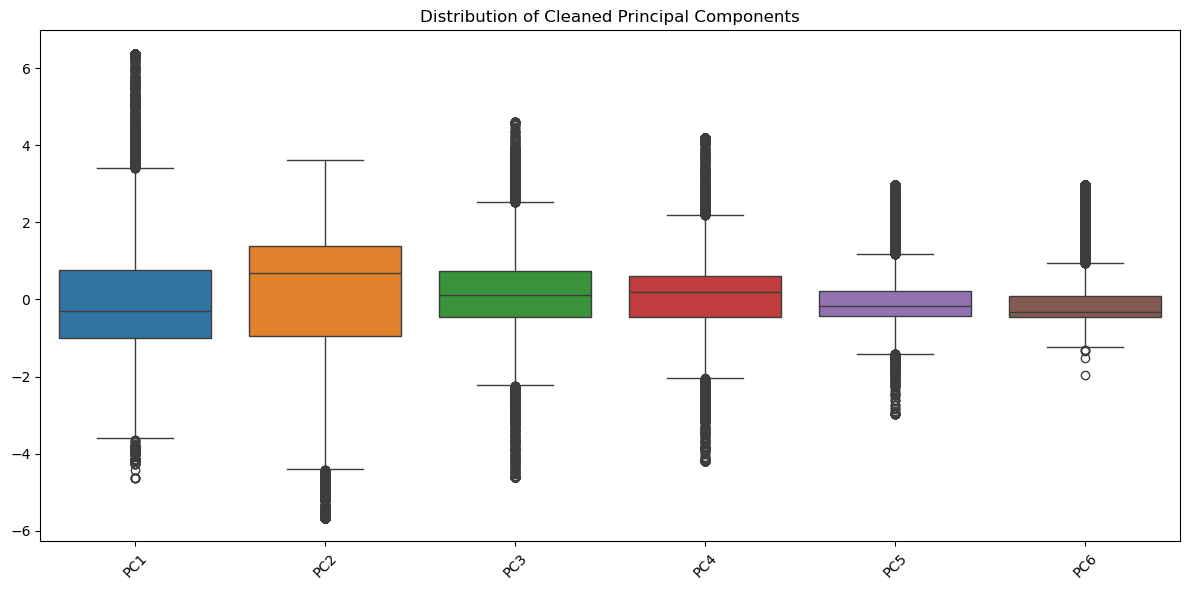

In [53]:
# 3. Check for any remaining outliers with box plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=final_df_clean)
plt.title('Distribution of Cleaned Principal Components')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [54]:
# 4. Scale the cleaned components
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
final_df_scaled = pd.DataFrame(
    scaler.fit_transform(final_df_clean),
    columns=final_df_clean.columns
)

In [55]:
output_path = '../data/processed/Task_2_processed/model_ready/'
os.makedirs(output_path, exist_ok=True)

In [56]:
# Save preprocessed data
final_df_scaled.to_csv(f'{output_path}preprocessed_features.csv', index=False)
joblib.dump(scaler, f'{output_path}final_scaler.pkl')

['../data/processed/Task_2_processed/model_ready/final_scaler.pkl']

In [57]:
preprocessing_summary = {
    'initial_shape': final_df.shape,
    'cleaned_shape': final_df_clean.shape,
    'scaling_method': 'StandardScaler',
    'outlier_threshold': 3,
    'components_used': final_df.columns.tolist(),
    'variance_explained': {
        f'PC{i+1}': explained_var 
        for i, explained_var in enumerate(pca_model.explained_variance_ratio_)
    }
}

In [58]:

# Save preprocessing summary
with open(f'{output_path}preprocessing_summary.json', 'w') as f:
    json.dump(preprocessing_summary, f, indent=4)

In [59]:
# 7. Final check of data quality
final_stats = pd.DataFrame({
    'mean': final_df_scaled.mean(),
    'std': final_df_scaled.std(),
    'skew': final_df_scaled.skew(),
    'kurtosis': final_df_scaled.kurtosis()
})

In [60]:
print("\nFinal Data Statistics:")
print(final_stats)


Final Data Statistics:
             mean       std      skew  kurtosis
PC1  9.220344e-18  1.000041  0.679832  1.854952
PC2 -2.305086e-17  1.000041 -1.240632  0.962778
PC3  1.844069e-17  1.000041 -0.492400  1.256394
PC4 -9.220344e-18  1.000041 -0.355066  2.328464
PC5  9.220344e-18  1.000041  1.275275  3.780316
PC6  4.322036e-18  1.000041  2.304633  5.599967


### 4.Modeling 

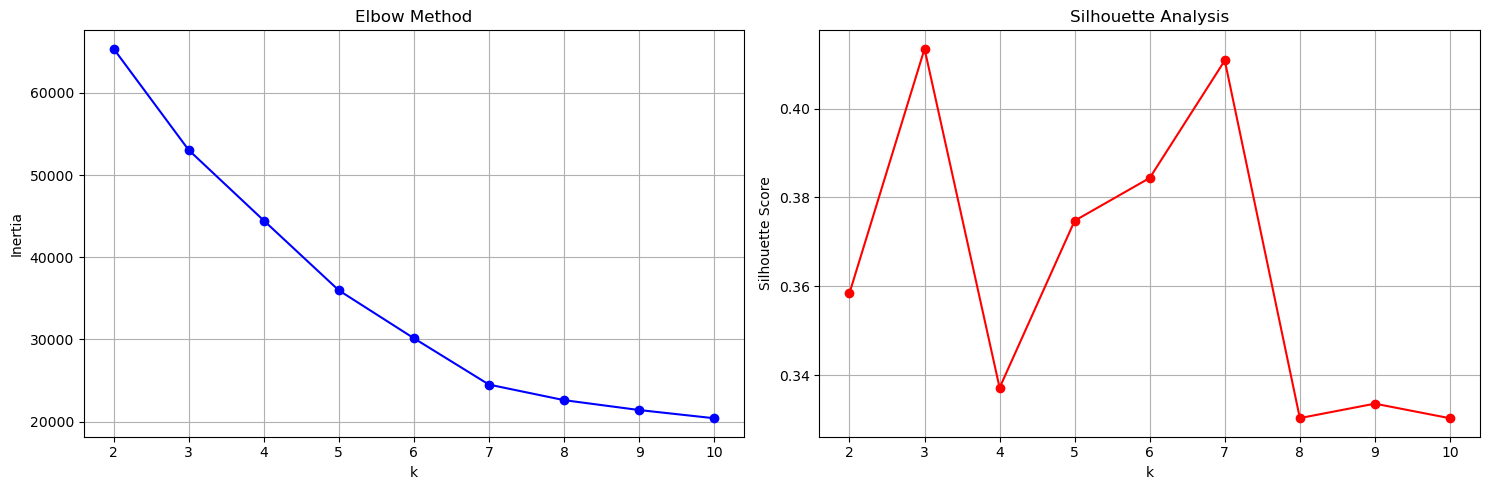

k=2:
Inertia: 65367.91
Silhouette Score: 0.358

k=3:
Inertia: 53042.78
Silhouette Score: 0.413

k=4:
Inertia: 44468.52
Silhouette Score: 0.337

k=5:
Inertia: 35969.68
Silhouette Score: 0.375

k=6:
Inertia: 30141.53
Silhouette Score: 0.384

k=7:
Inertia: 24504.19
Silhouette Score: 0.411

k=8:
Inertia: 22611.57
Silhouette Score: 0.330

k=9:
Inertia: 21408.14
Silhouette Score: 0.334

k=10:
Inertia: 20408.25
Silhouette Score: 0.330



In [61]:
# 4. Modeling
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import matplotlib.pyplot as plt
import seaborn as sns

# 4.1 K-means Implementation
def find_optimal_k(data, k_range=range(2, 11)):
    """
    Find optimal k using elbow method and silhouette score
    """
    inertias = []
    silhouette_scores = []
    
    for k in k_range:
        # Fit K-means
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        
        # Calculate metrics
        inertias.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(data, kmeans.labels_))
        
    # Plot results
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Elbow plot
    ax1.plot(k_range, inertias, 'bo-')
    ax1.set_xlabel('k')
    ax1.set_ylabel('Inertia')
    ax1.set_title('Elbow Method')
    ax1.grid(True)
    
    # Silhouette score plot
    ax2.plot(k_range, silhouette_scores, 'ro-')
    ax2.set_xlabel('k')
    ax2.set_ylabel('Silhouette Score')
    ax2.set_title('Silhouette Analysis')
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    return inertias, silhouette_scores

# Apply K-means analysis
inertias, silhouette_scores = find_optimal_k(final_df_scaled)

# Print scores for each k
for k in range(2, 11):
    print(f"k={k}:")
    print(f"Inertia: {inertias[k-2]:.2f}")
    print(f"Silhouette Score: {silhouette_scores[k-2]:.3f}\n")

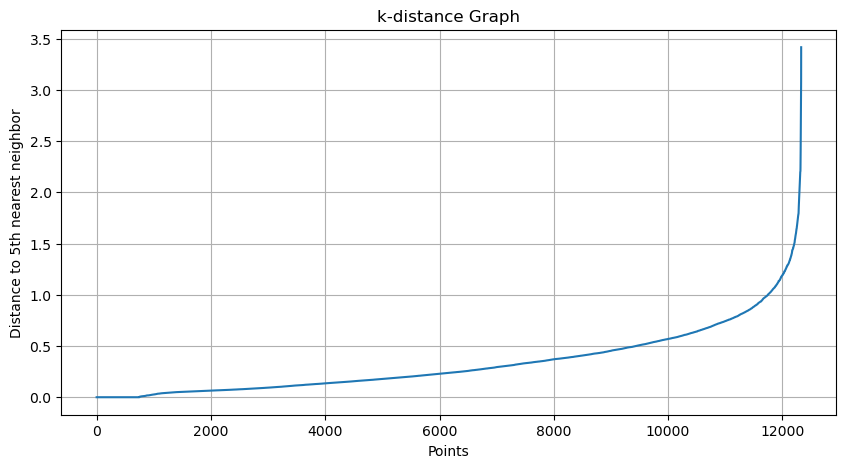

In [62]:
# 4.2 DBSCAN Implementation
def find_optimal_eps(data, min_samples=5):
    """
    Find optimal eps for DBSCAN using nearest neighbors
    """
    from sklearn.neighbors import NearestNeighbors
    
    # Calculate distances
    neigh = NearestNeighbors(n_neighbors=min_samples)
    neigh.fit(data)
    distances, _ = neigh.kneighbors(data)
    
    # Sort distances
    distances = np.sort(distances[:, min_samples-1])
    
    # Plot k-distance graph
    plt.figure(figsize=(10, 5))
    plt.plot(distances)
    plt.xlabel('Points')
    plt.ylabel(f'Distance to {min_samples}th nearest neighbor')
    plt.title('k-distance Graph')
    plt.grid(True)
    plt.show()
    
    return distances

# Find optimal eps
distances = find_optimal_eps(final_df_scaled)

In [63]:
# 4.3 Apply both clustering algorithms
def apply_clustering(data, k=4, eps=0.5, min_samples=5):
    """
    Apply both K-means and DBSCAN clustering
    """
    # K-means
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_labels = kmeans.fit_predict(data)
    
    # DBSCAN
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan_labels = dbscan.fit_predict(data)
    
    # Calculate metrics
    metrics = {
        'kmeans': {
            'silhouette': silhouette_score(data, kmeans_labels),
            'calinski_harabasz': calinski_harabasz_score(data, kmeans_labels),
            'davies_bouldin': davies_bouldin_score(data, kmeans_labels)
        },
        'dbscan': {
            'silhouette': silhouette_score(data[dbscan_labels != -1], 
                                         dbscan_labels[dbscan_labels != -1])
            if len(set(dbscan_labels)) > 1 else 0,
            'calinski_harabasz': calinski_harabasz_score(data, dbscan_labels),
            'davies_bouldin': davies_bouldin_score(data[dbscan_labels != -1], 
                                                 dbscan_labels[dbscan_labels != -1])
            if len(set(dbscan_labels)) > 1 else 0
        }
    }
    
    return kmeans_labels, dbscan_labels, metrics

# Apply clustering with optimal parameters
# (We'll set these based on the results from previous steps)
kmeans_labels, dbscan_labels, metrics = apply_clustering(
    final_df_scaled,
    k=4,  # Based on elbow method
    eps=0.5,  # Based on k-distance graph
    min_samples=5
)

# Print clustering results
print("\nClustering Results:")
print("\nK-means metrics:")
for metric, value in metrics['kmeans'].items():
    print(f"{metric}: {value:.3f}")

print("\nDBSCAN metrics:")
for metric, value in metrics['dbscan'].items():
    print(f"{metric}: {value:.3f}")


Clustering Results:

K-means metrics:
silhouette: 0.337
calinski_harabasz: 2726.713
davies_bouldin: 1.178

DBSCAN metrics:
silhouette: -0.027
calinski_harabasz: 133.947
davies_bouldin: 0.734


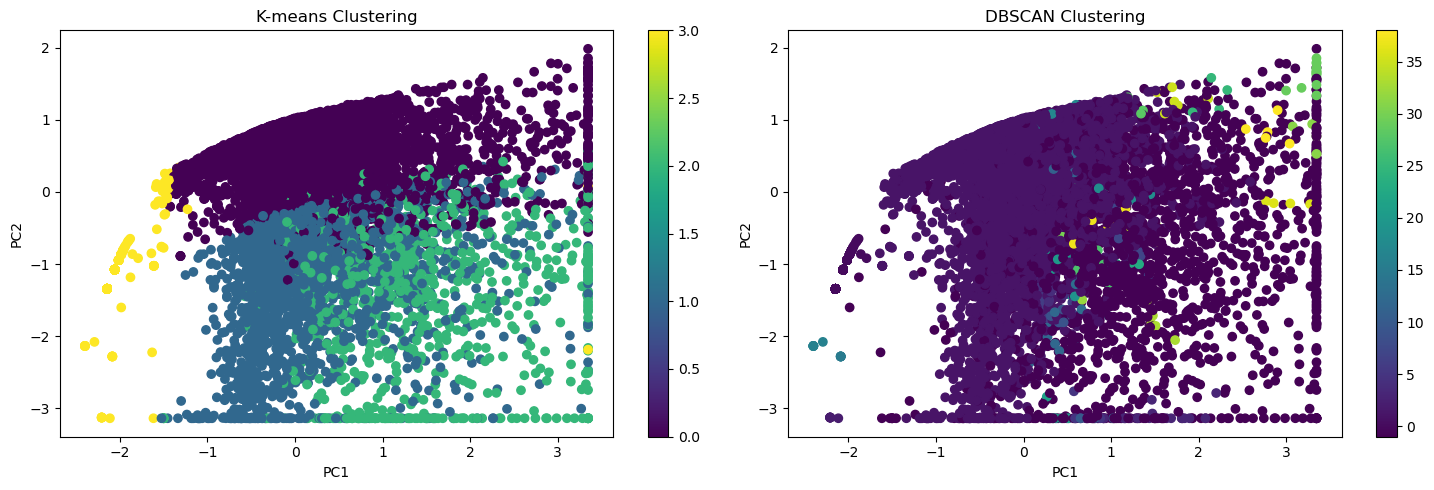

In [64]:
# 4.4 Visualize clustering results
def plot_cluster_results(data, kmeans_labels, dbscan_labels, components=[0, 1]):
    """
    Visualize clustering results using first two components
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # K-means plot
    scatter1 = ax1.scatter(data.iloc[:, components[0]], 
                          data.iloc[:, components[1]], 
                          c=kmeans_labels, 
                          cmap='viridis')
    ax1.set_title('K-means Clustering')
    ax1.set_xlabel(f'PC{components[0]+1}')
    ax1.set_ylabel(f'PC{components[1]+1}')
    plt.colorbar(scatter1, ax=ax1)
    
    # DBSCAN plot
    scatter2 = ax2.scatter(data.iloc[:, components[0]], 
                          data.iloc[:, components[1]], 
                          c=dbscan_labels, 
                          cmap='viridis')
    ax2.set_title('DBSCAN Clustering')
    ax2.set_xlabel(f'PC{components[0]+1}')
    ax2.set_ylabel(f'PC{components[1]+1}')
    plt.colorbar(scatter2, ax=ax2)
    
    plt.tight_layout()
    plt.show()

# Plot results
plot_cluster_results(final_df_scaled, kmeans_labels, dbscan_labels)

### 5.Evaluation